# KeyStrokes Dyanmics Based Authentication

In [1]:
from random import uniform, randint
from math import floor, ceil
from scipy.spatial import distance

import numpy as np
import pandas as pd

import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Activation, Add, Dense, Dropout, Input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, TensorBoard
from keras.metrics import binary_accuracy
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
# %matplotlib notebook

Using TensorFlow backend.


Password `.tie5Roanl`

In [2]:
sample_x = []

In [4]:
global fc_model
global graph
graph = tf.get_default_graph()

In [3]:
df = pd.read_csv("DSL-StrongPasswordData.csv")
df.head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
4    s002             1    5    0.1249       0.2317       0.1068  0.0895   

   DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   

   UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
0  0.2583  0.1338       0.3509       0.2171    0.0742  
1  0.1496  0.0839       0.2756       0.1917    0.0747  
2  0.1533  0.1085       0.2847       0.1762    0.0945  
3  0.1475  0.0845       0.3232       0.2387    0.0813  
4  0.1633  0.0903       0.2517       0.1614    0.0818  

[5 rows x 34 columns]

## Analysing the Data

In [5]:
df.describe()

sessionIndex           rep      H.period   DD.period.t   UD.period.t  \
count  20400.000000  20400.000000  20400.000000  20400.000000  20400.000000   
mean       4.500000     25.500000      0.093379      0.264148      0.170769   
std        2.291344     14.431223      0.029626      0.220534      0.226836   
min        1.000000      1.000000      0.001400      0.018700     -0.235800   
25%        2.750000     13.000000      0.074400      0.146900      0.049800   
50%        4.500000     25.500000      0.089500      0.205950      0.108700   
75%        6.250000     38.000000      0.107900      0.306450      0.212400   
max        8.000000     50.000000      0.376100     12.506100     12.451700   

                H.t        DD.t.i        UD.t.i           H.i        DD.i.e  \
count  20400.000000  20400.000000  20400.000000  20400.000000  20400.000000   
mean       0.085727      0.169085      0.083358      0.081565      0.159372   
std        0.027424      0.123546      0.125755      0.026887      0.226928   
min        0.009300      0.001100     -0.162100      0.003200      0.001400   
25%        0.066000      0.113600      0.027200      0.062000      0.089300   
50%        0.081000      0.140400      0.057800      0.077100      0.120900   
75%        0.099800      0.183900      0.096400      0.096900      0.173100   
max        0.241100      4.919700      4.799900      0.331200     25.987300   

       ...           H.a        DD.a.n        UD.a.n           H.n  \
count  ...  20400.000000  20400.000000  20400.000000  20400.000000   
mean   ...      0.106259      0.150670      0.044411      0.089899   
std    ...      0.038828      0.107422      0.105197      0.030738   
min    ...      0.004000      0.001100     -0.235500      0.003700   
25%    ...      0.082100      0.096100     -0.009000      0.067300   
50%    ...      0.101900      0.125000      0.022700      0.085300   
75%    ...      0.122300      0.174600      0.068900      0.107900   
max    ...      2.035300      3.327800      2.524200      0.357700   

             DD.n.l        UD.n.l           H.l   DD.l.Return   UD.l.Return  \
count  20400.000000  20400.000000  20400.000000  20400.000000  20400.000000   
mean       0.202630      0.112731      0.095589      0.321847      0.226259   
std        0.150191      0.159571      0.028348      0.225389      0.230759   
min        0.001300     -0.175800      0.003700      0.008300     -0.124500   
25%        0.127600      0.023500      0.077400      0.210000      0.114100   
50%        0.172500      0.095500      0.093700      0.263000      0.160300   
75%        0.228800      0.145700      0.111100      0.350200      0.255100   
max        4.025200      3.978200      0.340700      5.883600      5.836400   

           H.Return  
count  20400.000000  
mean       0.088306  
std        0.027452  
min        0.002900  
25%        0.069900  
50%        0.085500  
75%        0.103700  
max        0.265100  

[8 rows x 33 columns]

In [4]:
df.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [5]:
df.groupby('subject')['H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'].describe()

H.period                                                           \
           count      mean       std     min       25%      50%       75%   
subject                                                                     
s002       400.0  0.106958  0.024979  0.0103  0.092700  0.10390  0.116250   
s003       400.0  0.157293  0.042576  0.0372  0.130700  0.14890  0.174275   
s004       400.0  0.103745  0.016934  0.0420  0.094500  0.10430  0.115400   
s005       400.0  0.081963  0.013252  0.0415  0.073700  0.08115  0.088700   
s007       400.0  0.095211  0.014978  0.0478  0.084200  0.09500  0.105100   
s008       400.0  0.087904  0.020212  0.0069  0.075425  0.08550  0.097100   
s010       400.0  0.089034  0.011081  0.0449  0.081750  0.08820  0.096100   
s011       400.0  0.081427  0.018277  0.0372  0.069200  0.08000  0.091600   
s012       400.0  0.140250  0.026862  0.0014  0.122125  0.13775  0.153900   
s013       400.0  0.080338  0.011909  0.0465  0.072100  0.08080  0.087975   
s015       400.0  0.078122  0.017669  0.0246  0.066800  0.07760  0.089500   
s016       400.0  0.104280  0.019873  0.0602  0.089000  0.10045  0.118575   
s017       400.0  0.071280  0.009042  0.0444  0.065500  0.07180  0.077600   
s018       400.0  0.091629  0.017373  0.0436  0.081600  0.09000  0.099800   
s019       400.0  0.077281  0.009290  0.0483  0.071225  0.07760  0.083475   
s020       400.0  0.109740  0.019245  0.0394  0.097700  0.11190  0.123875   
s021       400.0  0.099546  0.015624  0.0153  0.089200  0.09820  0.109875   
s022       400.0  0.054491  0.007965  0.0328  0.050200  0.05490  0.058900   
s024       400.0  0.073995  0.012070  0.0140  0.066500  0.07340  0.081650   
s025       400.0  0.110121  0.018543  0.0742  0.097625  0.10825  0.120400   
s026       400.0  0.083103  0.009244  0.0652  0.077100  0.08210  0.087100   
s027       400.0  0.098920  0.016575  0.0584  0.086825  0.09690  0.108575   
s028       400.0  0.071253  0.010081  0.0496  0.065425  0.07035  0.076650   
s029       400.0  0.086149  0.009916  0.0523  0.079650  0.08610  0.092400   
s030       400.0  0.139943  0.033856  0.0681  0.117650  0.13960  0.163675   
s031       400.0  0.102744  0.021259  0.0536  0.086975  0.10360  0.117700   
s032       400.0  0.106292  0.014479  0.0586  0.098325  0.10695  0.115900   
s033       400.0  0.093802  0.024145  0.0140  0.073250  0.09405  0.112525   
s034       400.0  0.092586  0.016928  0.0069  0.081000  0.09195  0.103700   
s035       400.0  0.053406  0.009290  0.0322  0.047200  0.05200  0.057800   
s036       400.0  0.046368  0.006525  0.0288  0.041925  0.04620  0.050400   
s037       400.0  0.107253  0.018703  0.0383  0.095575  0.10725  0.117400   
s038       400.0  0.089541  0.018758  0.0409  0.074900  0.08630  0.100200   
s039       400.0  0.080426  0.011487  0.0343  0.073025  0.07860  0.086000   
s040       400.0  0.111795  0.016498  0.0654  0.102100  0.11110  0.121100   
s041       400.0  0.174045  0.028245  0.0509  0.157925  0.17500  0.191700   
s042       400.0  0.102486  0.019429  0.0594  0.089125  0.10260  0.114625   
s043       400.0  0.060295  0.007527  0.0362  0.055700  0.06055  0.064900   
s044       400.0  0.077319  0.014593  0.0449  0.067800  0.07490  0.083600   
s046       400.0  0.107903  0.020215  0.0261  0.095150  0.10725  0.121300   
s047       400.0  0.086283  0.020760  0.0180  0.072800  0.08535  0.099500   
s048       400.0  0.098574  0.014455  0.0240  0.090500  0.09800  0.107900   
s049       400.0  0.081740  0.010740  0.0549  0.074850  0.08050  0.087300   
s050       400.0  0.084314  0.012924  0.0483  0.075925  0.08325  0.093175   
s051       400.0  0.102949  0.020195  0.0082  0.089625  0.10260  0.115800   
s052       400.0  0.057601  0.008884  0.0127  0.052150  0.05730  0.063600   
s053       400.0  0.101146  0.024772  0.0180  0.086225  0.10260  0.117975   
s054       400.0  0.088336  0.018816  0.0277  0.073100  0.09010  0.101375   
s055       400.0  0.094679  0.010841  0.0586  0.087250  0.09470  0.100525   
s056

In [29]:
test_df = df[(df.sessionIndex == 8) & (df.rep>40)]
test_df = test_df.drop(["sessionIndex", "rep"], axis="columns")
test_df.head()

subject  H.period  DD.period.t  UD.period.t     H.t  DD.t.i  UD.t.i  \
390    s002    0.1557       0.2169       0.0612  0.1214  0.1827  0.0613   
391    s002    0.1528       0.1654       0.0126  0.1270  0.1547  0.0277   
392    s002    0.1655       0.2483       0.0828  0.1114  0.3648  0.2534   
393    s002    0.1536       0.2103       0.0567  0.1307  0.1862  0.0555   
394    s002    0.1552       0.2024       0.0472  0.1154  0.1101 -0.0053   

        H.i  DD.i.e  UD.i.e  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
390  0.1138  0.1029 -0.0109  ...  0.1333  0.1230 -0.0103  0.1130  0.2410   
391  0.1264  0.1304  0.0040  ...  0.1470  0.0977 -0.0493  0.1644  0.2444   
392  0.1497  0.1954  0.0457  ...  0.1518  0.1648  0.0130  0.1024  0.3811   
393  0.1196  0.1381  0.0185  ...  0.1613  0.1573 -0.0040  0.1125  0.2273   
394  0.1357  0.1898  0.0541  ...  0.1645  0.1521 -0.0124  0.1003  0.2043   

     UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
390  0.1280  0.1267       0.2881       0.1614    0.1270  
391  0.0800  0.1610       0.3688       0.2078    0.2027  
392  0.2787  0.1351       0.3092       0.1741    0.0911  
393  0.1148  0.1173       0.3241       0.2068    0.0977  
394  0.1040  0.1285       0.2849       0.1564    0.0768  

[5 rows x 32 columns]

In [30]:
test_cols = np.setdiff1d(test_df.columns.values, np.array(["subject"]))
test_cols = np.setdiff1d(test_cols, np.array(['UD.Shift.r.o', 'UD.a.n',
       'UD.e.five', 'UD.five.Shift.r', 'UD.i.e', 'UD.l.Return', 'UD.n.l',
       'UD.o.a', 'UD.period.t', 'UD.t.i']))
test_cols

array(['DD.Shift.r.o', 'DD.a.n', 'DD.e.five', 'DD.five.Shift.r', 'DD.i.e',
       'DD.l.Return', 'DD.n.l', 'DD.o.a', 'DD.period.t', 'DD.t.i',
       'H.Return', 'H.Shift.r', 'H.a', 'H.e', 'H.five', 'H.i', 'H.l',
       'H.n', 'H.o', 'H.period', 'H.t'], dtype=object)

In [31]:
test_df.columns[0]

H_cols = []
DD_cols = []
UD_cols = []

for col in test_df.columns:
    if col[0] == "H":
        H_cols.append(col)
    elif col[0] == "D":
        DD_cols.append(col)
    elif col[0] == "U":
        UD_cols.append(col)
        
DD_cols

['DD.period.t',
 'DD.t.i',
 'DD.i.e',
 'DD.e.five',
 'DD.five.Shift.r',
 'DD.Shift.r.o',
 'DD.o.a',
 'DD.a.n',
 'DD.n.l',
 'DD.l.Return']

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[test_cols])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
points = pd.DataFrame(pca.transform(test_df[test_cols]))
#points = points[(points[0] < 2) & (points[1] < 5)]
#plt.plot(points[0], points[1], '.')

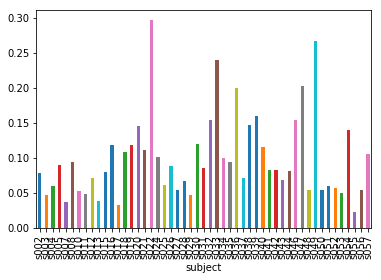

In [24]:
graphsubject = "s022"
graphcols = DD_cols
finalSession = df[(df.subject==graphsubject) & (df.sessionIndex == 8)]
mean_final = finalSession.median()
testSession = df[(df.subject==graphsubject) & (df.sessionIndex == 8)]
mean_test = testSession.mean()

# ax1 = (mean_test[graphcols] - mean_final[graphcols]).plot.bar()
# ax1.set_ylim(-0.03,0.03)
# df[(df.subject==graphsubject)][DD_cols].std()
df.groupby("subject")[DD_cols[8]].std().plot.bar()
# df[(df.subject==graphsubject)][DD_cols].std().plot.bar()
# df[(df.subject==graphsubject)][DD_cols[0]].plot()

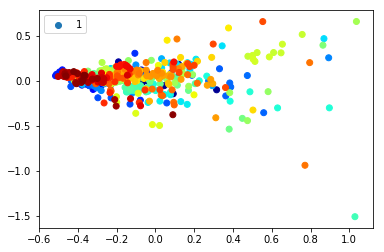

In [10]:
i = 0
col = 0
colors = []
for index, row in points.iterrows():
    if i%10 == 0:
        col = col + 1
    colors.append(col)

a = plt.scatter(points[0], points[1], c=colors, cmap='jet')
plt.legend((a,), colors)

Text(0.5, 1.0, 'H.Shift.r')

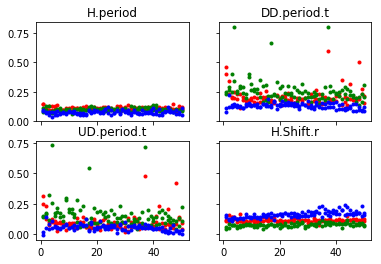

In [372]:
subplot_df_1 = df[(df.subject == "s002") & (df.sessionIndex< 3)]
subplot_df_2 = df[(df.subject == "s007") & (df.sessionIndex< 3)]
subplot_df_3 = df[(df.subject == "s011") & (df.sessionIndex> 6)]

param1 = 'H.period'
param2 = 'DD.period.t'
param3 = 'UD.period.t'
param4 = 'H.Shift.r'

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

##test_df_2[['H.period']].plot()
ax1.plot(subplot_df_1.rep, subplot_df_1[param1], 'r.', subplot_df_2.rep, subplot_df_2[param1], 'g.', subplot_df_3.rep, subplot_df_3[param1], 'b.' )
ax1.set_title("H.period")
ax2.plot(subplot_df_1.rep, subplot_df_1[param2], 'r.', subplot_df_2.rep, subplot_df_2[param2], 'g.', subplot_df_3.rep, subplot_df_3[param2], 'b.')
ax2.set_title("DD.period.t")
ax3.plot(subplot_df_1.rep, subplot_df_1[param3], 'r.', subplot_df_2.rep, subplot_df_2[param3], 'g.', subplot_df_3.rep, subplot_df_3[param3], 'b.')
ax3.set_title("UD.period.t")
ax4.plot(subplot_df_1.rep, subplot_df_1[param4], 'r.', subplot_df_2.rep, subplot_df_2[param4], 'g.', subplot_df_3.rep, subplot_df_3[param4], 'b.')
ax4.set_title("H.Shift.r")

0.06940761635498521
0.10706227801017157
0.030393152405292098


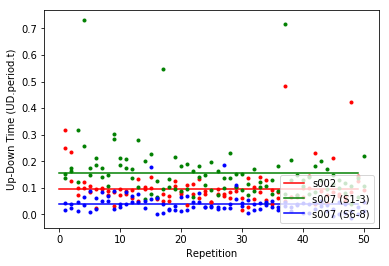

In [129]:
subplot_df_1 = df[(df.subject == "s002") & (df.sessionIndex< 3)]
subplot_df_2 = df[(df.subject == "s007") & (df.sessionIndex< 3)]
subplot_df_3 = df[(df.subject == "s007") & (df.sessionIndex> 6)]

param1 = 'H.period'
param1 = 'DD.period.t'
param1 = 'UD.period.t'
param4 = 'H.Shift.r'

print(subplot_df_1[param1].std())
print(subplot_df_2[param1].std())
print(subplot_df_3[param1].std())

plt.plot(range(50) ,np.ones(50) * subplot_df_1[param1].mean(), "r-")
plt.plot(range(50) ,np.ones(50) * subplot_df_2[param1].mean(), "g-")
plt.plot(range(50) ,np.ones(50) * subplot_df_3[param1].mean(), "b-")

plt.plot(subplot_df_1.rep, subplot_df_1[param1], 'r.', subplot_df_2.rep, subplot_df_2[param1], 'g.', subplot_df_3.rep, subplot_df_3[param1], 'b.' )
plt.xlabel("Repetition")
plt.ylabel("Up-Down Time (UD.period.t)")
# plt.ylim(-0.5, 0.3)
plt.legend(["s002", "s007 (S1-3)", "s007 (S6-8)"], loc='lower right')

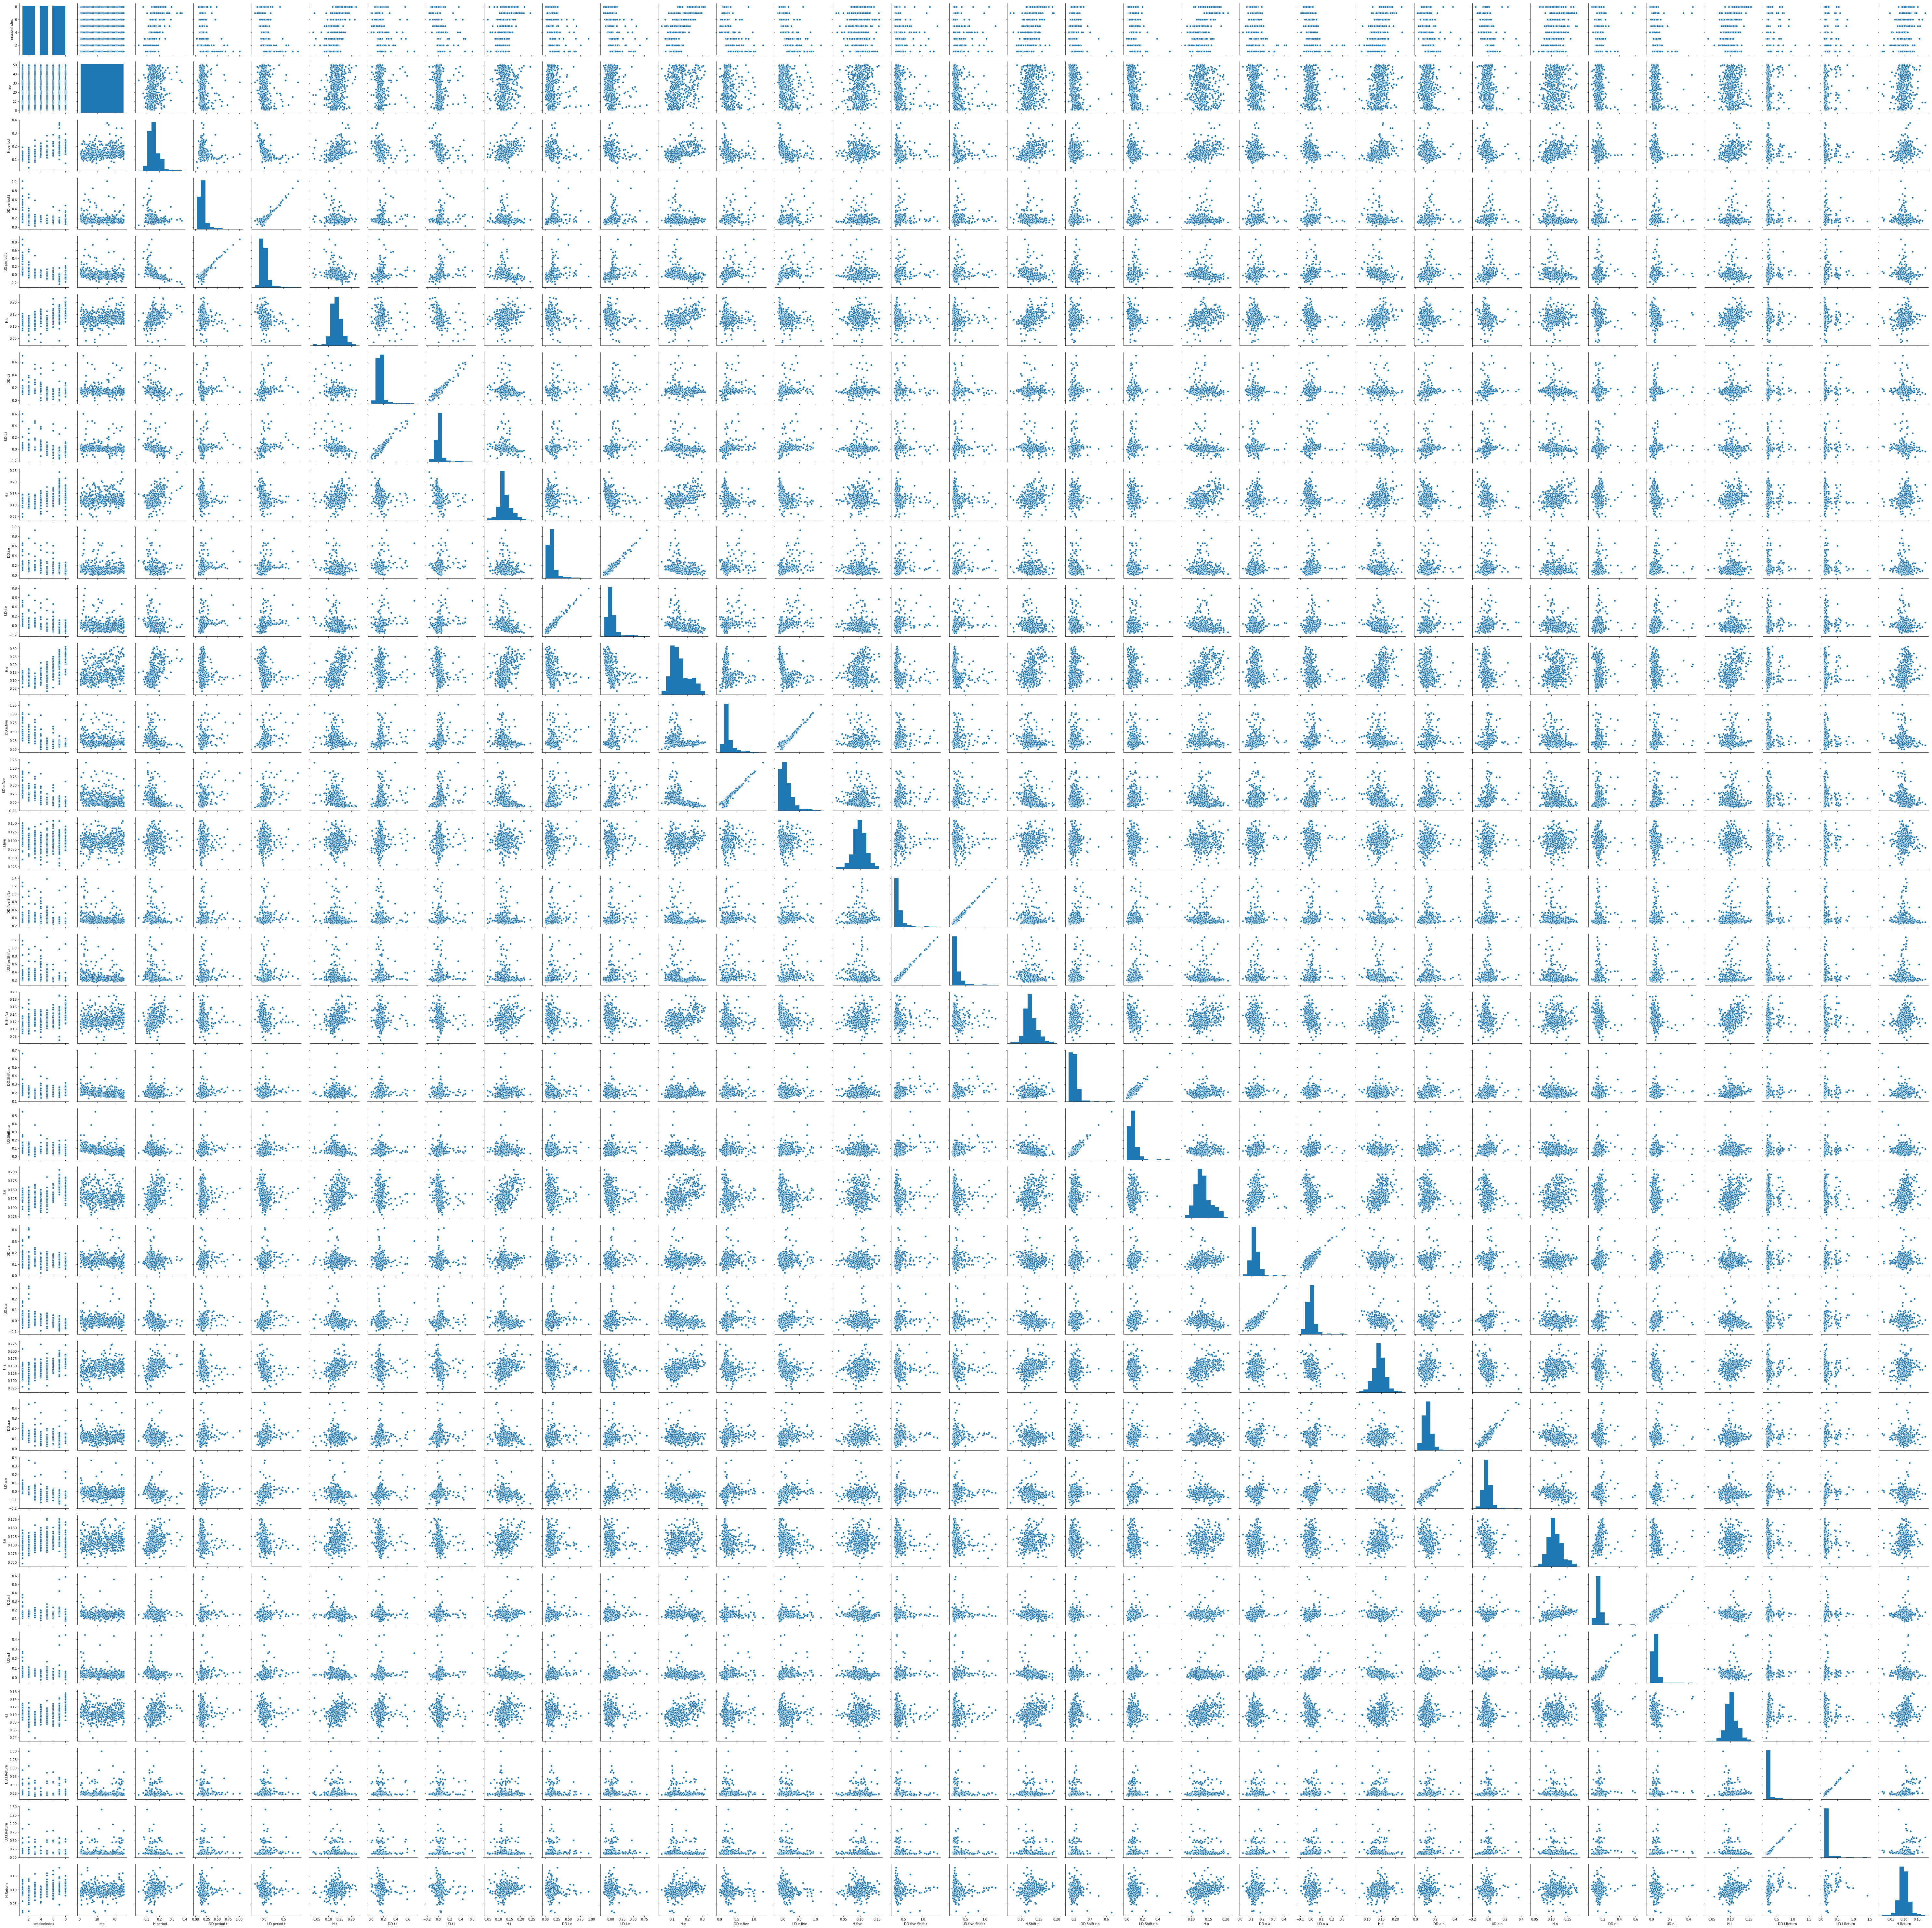

In [40]:
sns.pairplot(subplot_df_1);

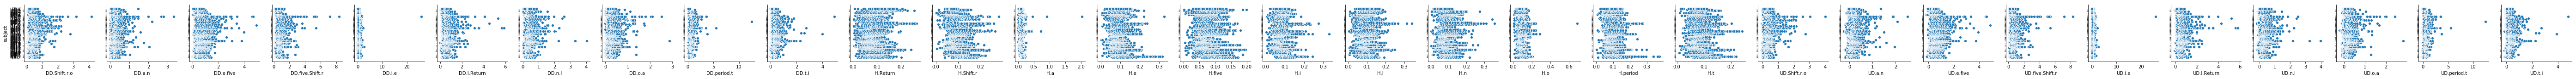

In [43]:
sns.pairplot(df, y_vars=['subject'], x_vars=test_cols)

In [442]:
from sklearn import feature_selection
from sklearn import preprocessing

(f, p) = feature_selection.f_classif(df[test_cols], df["subject"])
min_max_scaler = preprocessing.MinMaxScaler()
f_scaled = min_max_scaler.fit_transform(pd.DataFrame(f))
pd.DataFrame(f_scaled).describe()
pd.DataFrame(f_scaled).sort()

# df[test_cols].min()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [6]:
subject = "s003"
subjdf = df[(df.subject == subject)]
subjdf = subjdf[["sessionIndex", "rep"] + DD_cols[1:2]]
subjdf.head()

sessionIndex  rep  DD.t.i
400             1    1  0.1737
401             1    2  0.1908
402             1    3  0.1439
403             1    4  0.7023
404             1    5  0.1584

In [13]:
traindf = pd.DataFrame(columns=["sess", "rep", "col", "fsess", "frep"])
testdf = np.array([])
subj_count = 0

for subject in df["subject"].unique():
    subjdf = df[(df.subject == subject)]
    subjdf = subjdf[["sessionIndex", "rep"] + DD_cols[1:2]]
    indexedsubj = subjdf.set_index(["sessionIndex", "rep"])
    tempdfarr = []
    temptestarr = []

    for (sess, rep, col) in subjdf.values:
        for s in range(1, 9):
            for r in range(1, 51):
#                 tempdfarr.append(pd.DataFrame([[sess, rep, col, s, r]], columns=["sess", "rep", "col", "fsess", "frep"]))
                tempdfarr.append([sess, rep, col, s, r])
                temptestarr.append(indexedsubj.loc[s,r])
        print(sess, rep)

    traindf = traindf.append(pd.DataFrame(tempdfarr, columns=["sess", "rep", "col", "fsess", "frep"]))
    testdf = np.append(testdf, temptestarr)
    
    print("=========","Done: ", subject, " =========")
    subj_count = subj_count + 1
    if subj_count > 10:
        break;


1.0 1.0
1.0 2.0
1.0 3.0
1.0 4.0
1.0 5.0
1.0 6.0
1.0 7.0
1.0 8.0
1.0 9.0
1.0 10.0
1.0 11.0
1.0 12.0
1.0 13.0
1.0 14.0
1.0 15.0
1.0 16.0
1.0 17.0
1.0 18.0
1.0 19.0
1.0 20.0
1.0 21.0
1.0 22.0
1.0 23.0
1.0 24.0
1.0 25.0
1.0 26.0
1.0 27.0
1.0 28.0
1.0 29.0
1.0 30.0
1.0 31.0
1.0 32.0
1.0 33.0
1.0 34.0
1.0 35.0
1.0 36.0
1.0 37.0
1.0 38.0
1.0 39.0
1.0 40.0
1.0 41.0
1.0 42.0
1.0 43.0
1.0 44.0
1.0 45.0
1.0 46.0
1.0 47.0
1.0 48.0
1.0 49.0
1.0 50.0
2.0 1.0
2.0 2.0
2.0 3.0
2.0 4.0
2.0 5.0
2.0 6.0
2.0 7.0
2.0 8.0
2.0 9.0
2.0 10.0
2.0 11.0
2.0 12.0
2.0 13.0
2.0 14.0
2.0 15.0
2.0 16.0
2.0 17.0
2.0 18.0
2.0 19.0
2.0 20.0
2.0 21.0
2.0 22.0
2.0 23.0
2.0 24.0
2.0 25.0
2.0 26.0
2.0 27.0
2.0 28.0
2.0 29.0
2.0 30.0
2.0 31.0
2.0 32.0
2.0 33.0
2.0 34.0
2.0 35.0
2.0 36.0
2.0 37.0
2.0 38.0
2.0 39.0
2.0 40.0
2.0 41.0
2.0 42.0
2.0 43.0
2.0 44.0
2.0 45.0
2.0 46.0
2.0 47.0
2.0 48.0
2.0 49.0
2.0 50.0
3.0 1.0
3.0 2.0
3.0 3.0
3.0 4.0
3.0 5.0
3.0 6.0
3.0 7.0
3.0 8.0
3.0 9.0
3.0 10.0
3.0 11.0
3.0 12.0
3.0 13.0
3.0 14.0
3

3.0 23.0
3.0 24.0
3.0 25.0
3.0 26.0
3.0 27.0
3.0 28.0
3.0 29.0
3.0 30.0
3.0 31.0
3.0 32.0
3.0 33.0
3.0 34.0
3.0 35.0
3.0 36.0
3.0 37.0
3.0 38.0
3.0 39.0
3.0 40.0
3.0 41.0
3.0 42.0
3.0 43.0
3.0 44.0
3.0 45.0
3.0 46.0
3.0 47.0
3.0 48.0
3.0 49.0
3.0 50.0
4.0 1.0
4.0 2.0
4.0 3.0
4.0 4.0
4.0 5.0
4.0 6.0
4.0 7.0
4.0 8.0
4.0 9.0
4.0 10.0
4.0 11.0
4.0 12.0
4.0 13.0
4.0 14.0
4.0 15.0
4.0 16.0
4.0 17.0
4.0 18.0
4.0 19.0
4.0 20.0
4.0 21.0
4.0 22.0
4.0 23.0
4.0 24.0
4.0 25.0
4.0 26.0
4.0 27.0
4.0 28.0
4.0 29.0
4.0 30.0
4.0 31.0
4.0 32.0
4.0 33.0
4.0 34.0
4.0 35.0
4.0 36.0
4.0 37.0
4.0 38.0
4.0 39.0
4.0 40.0
4.0 41.0
4.0 42.0
4.0 43.0
4.0 44.0
4.0 45.0
4.0 46.0
4.0 47.0
4.0 48.0
4.0 49.0
4.0 50.0
5.0 1.0
5.0 2.0
5.0 3.0
5.0 4.0
5.0 5.0
5.0 6.0
5.0 7.0
5.0 8.0
5.0 9.0
5.0 10.0
5.0 11.0
5.0 12.0
5.0 13.0
5.0 14.0
5.0 15.0
5.0 16.0
5.0 17.0
5.0 18.0
5.0 19.0
5.0 20.0
5.0 21.0
5.0 22.0
5.0 23.0
5.0 24.0
5.0 25.0
5.0 26.0
5.0 27.0
5.0 28.0
5.0 29.0
5.0 30.0
5.0 31.0
5.0 32.0
5.0 33.0
5.0 34.0
5.0 35.0
5

5.0 46.0
5.0 47.0
5.0 48.0
5.0 49.0
5.0 50.0
6.0 1.0
6.0 2.0
6.0 3.0
6.0 4.0
6.0 5.0
6.0 6.0
6.0 7.0
6.0 8.0
6.0 9.0
6.0 10.0
6.0 11.0
6.0 12.0
6.0 13.0
6.0 14.0
6.0 15.0
6.0 16.0
6.0 17.0
6.0 18.0
6.0 19.0
6.0 20.0
6.0 21.0
6.0 22.0
6.0 23.0
6.0 24.0
6.0 25.0
6.0 26.0
6.0 27.0
6.0 28.0
6.0 29.0
6.0 30.0
6.0 31.0
6.0 32.0
6.0 33.0
6.0 34.0
6.0 35.0
6.0 36.0
6.0 37.0
6.0 38.0
6.0 39.0
6.0 40.0
6.0 41.0
6.0 42.0
6.0 43.0
6.0 44.0
6.0 45.0
6.0 46.0
6.0 47.0
6.0 48.0
6.0 49.0
6.0 50.0
7.0 1.0
7.0 2.0
7.0 3.0
7.0 4.0
7.0 5.0
7.0 6.0
7.0 7.0
7.0 8.0
7.0 9.0
7.0 10.0
7.0 11.0
7.0 12.0
7.0 13.0
7.0 14.0
7.0 15.0
7.0 16.0
7.0 17.0
7.0 18.0
7.0 19.0
7.0 20.0
7.0 21.0
7.0 22.0
7.0 23.0
7.0 24.0
7.0 25.0
7.0 26.0
7.0 27.0
7.0 28.0
7.0 29.0
7.0 30.0
7.0 31.0
7.0 32.0
7.0 33.0
7.0 34.0
7.0 35.0
7.0 36.0
7.0 37.0
7.0 38.0
7.0 39.0
7.0 40.0
7.0 41.0
7.0 42.0
7.0 43.0
7.0 44.0
7.0 45.0
7.0 46.0
7.0 47.0
7.0 48.0
7.0 49.0
7.0 50.0
8.0 1.0
8.0 2.0
8.0 3.0
8.0 4.0
8.0 5.0
8.0 6.0
8.0 7.0
8.0 8.0
8.0 9.0
8

8.0 20.0
8.0 21.0
8.0 22.0
8.0 23.0
8.0 24.0
8.0 25.0
8.0 26.0
8.0 27.0
8.0 28.0
8.0 29.0
8.0 30.0
8.0 31.0
8.0 32.0
8.0 33.0
8.0 34.0
8.0 35.0
8.0 36.0
8.0 37.0
8.0 38.0
8.0 39.0
8.0 40.0
8.0 41.0
8.0 42.0
8.0 43.0
8.0 44.0
8.0 45.0
8.0 46.0
8.0 47.0
8.0 48.0
8.0 49.0
8.0 50.0
========= Done:  s010  =========
1.0 1.0
1.0 2.0
1.0 3.0
1.0 4.0
1.0 5.0
1.0 6.0
1.0 7.0
1.0 8.0
1.0 9.0
1.0 10.0
1.0 11.0
1.0 12.0
1.0 13.0
1.0 14.0
1.0 15.0
1.0 16.0
1.0 17.0
1.0 18.0
1.0 19.0
1.0 20.0
1.0 21.0
1.0 22.0
1.0 23.0
1.0 24.0
1.0 25.0
1.0 26.0
1.0 27.0
1.0 28.0
1.0 29.0
1.0 30.0
1.0 31.0
1.0 32.0
1.0 33.0
1.0 34.0
1.0 35.0
1.0 36.0
1.0 37.0
1.0 38.0
1.0 39.0
1.0 40.0
1.0 41.0
1.0 42.0
1.0 43.0
1.0 44.0
1.0 45.0
1.0 46.0
1.0 47.0
1.0 48.0
1.0 49.0
1.0 50.0
2.0 1.0
2.0 2.0
2.0 3.0
2.0 4.0
2.0 5.0
2.0 6.0
2.0 7.0
2.0 8.0
2.0 9.0
2.0 10.0
2.0 11.0
2.0 12.0
2.0 13.0
2.0 14.0
2.0 15.0
2.0 16.0
2.0 17.0
2.0 18.0
2.0 19.0
2.0 20.0
2.0 21.0
2.0 22.0
2.0 23.0
2.0 24.0
2.0 25.0
2.0 26.0
2.0 27.0
2.0 28.0
2.0 

2.0 38.0
2.0 39.0
2.0 40.0
2.0 41.0
2.0 42.0
2.0 43.0
2.0 44.0
2.0 45.0
2.0 46.0
2.0 47.0
2.0 48.0
2.0 49.0
2.0 50.0
3.0 1.0
3.0 2.0
3.0 3.0
3.0 4.0
3.0 5.0
3.0 6.0
3.0 7.0
3.0 8.0
3.0 9.0
3.0 10.0
3.0 11.0
3.0 12.0
3.0 13.0
3.0 14.0
3.0 15.0
3.0 16.0
3.0 17.0
3.0 18.0
3.0 19.0
3.0 20.0
3.0 21.0
3.0 22.0
3.0 23.0
3.0 24.0
3.0 25.0
3.0 26.0
3.0 27.0
3.0 28.0
3.0 29.0
3.0 30.0
3.0 31.0
3.0 32.0
3.0 33.0
3.0 34.0
3.0 35.0
3.0 36.0
3.0 37.0
3.0 38.0
3.0 39.0
3.0 40.0
3.0 41.0
3.0 42.0
3.0 43.0
3.0 44.0
3.0 45.0
3.0 46.0
3.0 47.0
3.0 48.0
3.0 49.0
3.0 50.0
4.0 1.0
4.0 2.0
4.0 3.0
4.0 4.0
4.0 5.0
4.0 6.0
4.0 7.0
4.0 8.0
4.0 9.0
4.0 10.0
4.0 11.0
4.0 12.0
4.0 13.0
4.0 14.0
4.0 15.0
4.0 16.0
4.0 17.0
4.0 18.0
4.0 19.0
4.0 20.0
4.0 21.0
4.0 22.0
4.0 23.0
4.0 24.0
4.0 25.0
4.0 26.0
4.0 27.0
4.0 28.0
4.0 29.0
4.0 30.0
4.0 31.0
4.0 32.0
4.0 33.0
4.0 34.0
4.0 35.0
4.0 36.0
4.0 37.0
4.0 38.0
4.0 39.0
4.0 40.0
4.0 41.0
4.0 42.0
4.0 43.0
4.0 44.0
4.0 45.0
4.0 46.0
4.0 47.0
4.0 48.0
4.0 49.0
4.0 50.0
5

In [32]:
# traindf.to_csv('traindf.csv')
# np.save('testdf.npy', testdf)

traindf = pd.read_csv('traindf.csv')[["sess", "rep", "col", "fsess", "frep"]]
testdf = np.load('testdf.npy')

In [33]:
traindf['rep_diff'] = traindf['frep'] - traindf['rep']
traindf['sess_diff'] = traindf['fsess'] - traindf['sess']
traindf['repno'] = ((traindf['sess'] - 1) * 50) + traindf['rep']
traindf['frepno'] = ((traindf['fsess'] - 1) * 50) + traindf['frep']
traindf['repno_diff'] = traindf['frepno'] - traindf['repno']

In [ ]:
indexedsubj = subjdf.set_index(["sessionIndex", "rep"])

traindf = pd.DataFrame(columns=["sess", "rep", "col", "fsess", "frep"])
testdf = np.array([])

for (sess, rep, col) in subjdf.values:
    tempdfarr = []
    for s in range(1, 9):
        for r in range(1, 51):
            row = {
                "sess": sess,
                "rep": rep,
                "col": col,
                "fsess": s,
                "frep": r
            }
#             traindf.append(row)
            tempdfarr.append(pd.DataFrame([[sess, rep, col, s, r]], columns=["sess", "rep", "col", "fsess", "frep"]))
            testdf = np.append(testdf, (indexedsubj.loc[s,r]))
    print(sess, rep)
            
    traindf = traindf.append(pd.concat(tempdfarr))

traindf.head()

In [89]:
lr = 1e-3
features = 3

# model = Sequential()
# model.add(Dense(1000, input_shape=(7,), activation="tanh"))
# model.add(Dense(500, activation="tanh" ))
# model.add(Dense(100, activation="tanh"))
# model.add(Dense(50))
# model.add(Dense(1))

input_1 = Input(shape=(features,))
dense_1 = Dense(100)(input_1)
dense_2= Dense(100)(dense_1)
dense_3= Dense(100)(dense_2)
dense_3 = Dense(features)(dense_3)
res_1 = Add()([input_1, dense_3])
dense_4 = Dense(10)(res_1)
out = Dense(1)(dense_4)

model = Model(inputs=input_1, outputs=out)

model.summary()
model.compile(optimizer=Adam(lr),
          loss='mae',
          metrics=['mse'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 3)            0                                            
__________________________________________________________________________________________________
dense_78 (Dense)                (None, 100)          400         input_14[0][0]                   
__________________________________________________________________________________________________
dense_79 (Dense)                (None, 100)          10100       dense_78[0][0]                   
__________________________________________________________________________________________________
dense_80 (Dense)                (None, 100)          10100       dense_79[0][0]                   
__________________________________________________________________________________________________
dense_81 (

In [90]:
model.fit(traindf[['col','repno', 'repno_diff']], testdf, 
          validation_split= 0.3, 
          epochs=30,
           callbacks=[ # TensorBoard(),
               EarlyStopping('val_loss', patience=5, restore_best_weights=True)
           ], 
          batch_size=512)

Train on 1232000 samples, validate on 528000 samples
Epoch 1/30
1232000/1232000 [==============================] - 12s 9us/step - loss: 0.5304 - mean_squared_error: 5.8305 - val_loss: 0.0600 - val_mean_squared_error: 0.0056
Epoch 2/30
1232000/1232000 [==============================] - 11s 9us/step - loss: 0.0403 - mean_squared_error: 0.0042 - val_loss: 0.0345 - val_mean_squared_error: 0.0034
Epoch 3/30
1232000/1232000 [==============================] - 11s 9us/step - loss: 0.0389 - mean_squared_error: 0.0041 - val_loss: 0.0342 - val_mean_squared_error: 0.0034
Epoch 4/30
1232000/1232000 [==============================] - 11s 9us/step - loss: 0.0391 - mean_squared_error: 0.0041 - val_loss: 0.0338 - val_mean_squared_error: 0.0034
Epoch 5/30
1232000/1232000 [==============================] - 11s 9us/step - loss: 0.0390 - mean_squared_error: 0.0040 - val_loss: 0.0378 - val_mean_squared_error: 0.0036
Epoch 6/30
1232000/1232000 [==============================] - 11s 9us/step - loss: 0.0388 - 

          col  repno  repno_diff
20050  0.1429   51.0         0.0
20051  0.1429   51.0         1.0
20052  0.1429   51.0         2.0
20053  0.1429   51.0         3.0
20054  0.1429   51.0         4.0
20055  0.1429   51.0         5.0
20056  0.1429   51.0         6.0
20057  0.1429   51.0         7.0
20058  0.1429   51.0         8.0
20059  0.1429   51.0         9.0
[0.1398 0.1396 0.1396 0.1395 0.1395 0.1394 0.1394 0.1393 0.1392 0.1392]
[0.1429 0.0987 0.1305 0.1218 0.1217 0.1207 0.0829 0.1301 0.1711 0.1518]


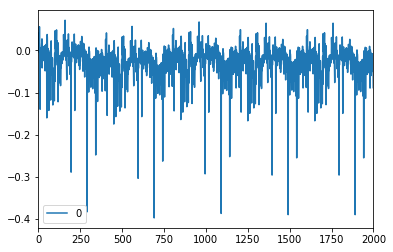

In [94]:
starti = 20050
columns = ['col','repno', 'repno_diff']
print(traindf[starti:starti+10][columns])
print(np.array(model.predict(traindf[starti:starti+10][columns])).flatten().astype(np.float16))
print(testdf[starti:starti+10])

a = np.array(model.predict(traindf[starti:starti+2000][columns])).flatten().astype(np.float16)
b = testdf[starti:starti+2000]
pd.DataFrame(a-b).plot()

In [ ]:
del test_df, points

## Generate Data

In [149]:
ll = 0.0001
ul = 3

train_cols = np.setdiff1d(test_df.columns.values, np.array(["subject", "sessionIndex", "rep"]))

In [ ]:
def get_fakes(fakes):
    global ll, ul
    return np.sort(
        np.append(
            np.linspace(0,1, floor(fakes/2), endpoint=False), 
            np.linspace(3,1, ceil(fakes/2), endpoint=False) 
        ))

In [153]:
# One-Hot encoded multi-class
def get_train_data():
    global df
    train_x = df[train_cols]
    train_y = df["subject"].astype('category')
    train_y = pd.get_dummies(train_y)
        
    return (train_x, train_y)

In [305]:
# Binary encoded Single Class
def get_train_data():
    global df
    subj = "s003"
    
    local_df = df[df["sessionIndex"] == 8]
    
    subset_df = local_df[local_df["subject"] == subj]
    x_true = subset_df[train_cols]
    y_true = np.ones(len(subset_df))
    
    subset_compliment_df = local_df[local_df.isin(subset_df).all(1)].sample(len(subset_df))
    x_false = subset_compliment_df[train_cols]
    y_false = np.zeros(len(subset_compliment_df))
    
    train_x = x_true.append(x_false)
    train_y = np.append(y_true, y_false)
        
    return (train_x, train_y)

In [ ]:
get_train_data()

## Models

### Fully Connected Neural Net (Multi-Class)

In [205]:
def get_model(input_len, classes):
    lr = 2e-3

    model = Sequential()
    # model.add(Dense(int((input_len+2)/2), input_shape=(input_len,)))
    model.add(Dense(int((input_len+2)*3), input_shape=(input_len,), activation="tanh"))
    model.add(Dropout(0.2))
    model.add(Dense(int((input_len+2)*3), activation="tanh"))
    model.add(Dense(classes, activation="softmax"))
    model.summary()
    
    model.compile(optimizer=Adam(lr),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mse'])
    
    return model

In [206]:
def train():
    global fc_model
    x, y = get_train_data()
    fc_model = get_model(len(x.columns), len(y.columns))
    
    fc_model.fit(x, y, 
              validation_split= 0.3, 
              epochs=100,
               callbacks=[ # TensorBoard(),
                   EarlyStopping('val_acc', patience=10, restore_best_weights=True)
               ], 
              batch_size=32)
    return 'trained'

loss: 0.4325 - acc: 0.8689 - mean_squared_error: 0.0037 - val_loss: 15.6569 - val_acc: 0.0191 - val_mean_squared_error: 0.0295

### Fully Connected Neural Net (Single-Class)

In [314]:
def get_model(input_len):
    lr = 1e-5

    model = Sequential()
    model.add(Dense(int((input_len+2)*2), input_shape=(input_len,), activation="tanh"))
    #model.add(Dense(int((input_len+2)*4), activation="tanh"))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()
    
    model.compile(optimizer=Adam(lr),
              loss='binary_crossentropy',
              metrics=['accuracy', 'mse'])
    
    return model

In [320]:
def train():
    global fc_model
    x, y = get_train_data()
    fc_model = get_model(len(x.columns))
    
    fc_model.fit(x, y, 
              validation_split= 0.3, 
              epochs=200,
               callbacks=[ # TensorBoard(),
                   # EarlyStopping('val_mean_squared_error', patience=10, restore_best_weights=True)
               ], 
              batch_size=70)
    return 'trained'

### Anomality Detection 

In [66]:
class db_stub:
    def __init__(self):
        self.samples = {}
        self.email = ""
        
    def cursor(self):
        return self
    
    def execute(self, query, params):
        self.email = params[0]
        if len(params) == 2:
            if params[0] in self.samples.keys():
                self.samples[params[0]].append([0, params[1]])
            else:
                self.samples[params[0]] = [[0, params[1]]]
                
    def commit(self):
        return self
    
    def fetchall(self):
        if self.email in self.samples.keys():
            return self.samples[self.email][-5:]
        else:
            return []

In [141]:
import numpy as np
from scipy.spatial import distance
from scipy.special import expit

class UserModel:
    detector = "cityblock"
    min_samples = 3
    min_threshold = 35
    max_threshold = 1000
    threshold_factor = 1.8
    
    
    feature_weights = [1000, 1, 1, 1000]

    def __init__(self, db, email):
        self.db = db
        self.email = email
        
        # Device Properties
        self.device_info = {
            "isMobile": False,
            "type": 3,
            "pwdlength": 0,
            "pwdhash": ""
        }

        # Keystroke Dynamics
        self.char_codes = []
        self.seek_times = []
        self.press_times = []
        self.key_codes = []

        # Calculated Model
        self.madx = {}
        self.central_tendancy = {}
        self.threshold = 0

        self.fetch_data()

    @staticmethod
    def parse_keystroke_string (keystroke_str):
        typing_data = keystroke_str.split('|')
        keystroke_data = np.array([x.split(',') for x in typing_data[1:]]).astype(np.float).T
        
        device_info = typing_data[0].split(',')
        char_code = keystroke_data[0]
        seek_time = keystroke_data[1]
        seek_time[0] = np.mean(seek_time[1:])  #normalize time to first stroke
        press_time = keystroke_data[2]
        key_code = keystroke_data[3]

        return (device_info, char_code, seek_time, press_time, key_code)

    @staticmethod
    def parse_device_info(device_info):
        info = {
            "isMobile": device_info[0] == 1,
            "type": device_info[3],
            "pwdlength": device_info[4],
            "pwdhash": device_info[5]
        }

        return info

    @staticmethod
    def mad(data, axis=None):
        madx = np.mean(np.absolute(data - np.median(data, axis)), axis)
        madx[madx == 0] = 1
        return madx

    @staticmethod
    def dist(central_tendency, samples, w=None):
        return distance.cdist(
            [central_tendency], samples, UserModel.detector, w=w, VI=None).flatten()
        
    @staticmethod
    def weighted_dist(char_code_dist, seek_time_dist, press_time_dist, key_code_dist):
        weights = np.array(UserModel.feature_weights)

        distances = np.array([char_code_dist, seek_time_dist, press_time_dist, key_code_dist])
        weighted_distance = np.sum(distances * weights)

        return weighted_distance

    def fetch_data(self):
        db = self.db

        self.char_codes = []
        self.seek_times = []
        self.press_times = []
        self.key_codes = []

        cursor = db.cursor()
        cursor.execute(
            "SELECT id, signature FROM keystroke_data WHERE email = %s ORDER BY id DESC LIMIT 5", 
            (self.email,) )
        result = cursor.fetchall()

        for row in result:
            kstr = row[1]
            (device_info, char_code, seek_time, press_time, key_code) = UserModel.parse_keystroke_string(kstr)
            
            self.device_info = UserModel.parse_device_info(device_info)
            self.char_codes += [char_code]
            self.seek_times += [seek_time]
            self.press_times += [press_time]
            self.key_codes += [key_code]

        if self.count() > 0:
            self.calc_central_tendency()
            self.calc_threshold()

    def calc_central_tendency(self):
        self.madx['char_code'] = UserModel.mad(self.char_codes, axis=0)
        self.madx['seek_time'] = UserModel.mad(self.seek_times, axis=0)
        self.madx['press_time'] = UserModel.mad(self.press_times, axis=0)
        self.madx['key_code'] = UserModel.mad(self.key_codes, axis=0)

        self.central_tendancy['char_code'] = np.median(self.char_codes, axis=0)
        self.central_tendancy['seek_time'] = np.median(self.seek_times, axis=0)
        self.central_tendancy['press_time'] = np.median(self.press_times, axis=0)
        self.central_tendancy['key_code'] = np.median(self.key_codes, axis=0)

    def calc_threshold(self):
        char_code_dist = np.max(UserModel.dist(self.central_tendancy['char_code'], self.char_codes, w=1/self.madx['char_code']))
        seek_time_dist = np.max(UserModel.dist(self.central_tendancy['seek_time'], self.seek_times, w=1/self.madx['seek_time']))
        press_time_dist = np.max(UserModel.dist(self.central_tendancy['press_time'], self.press_times, w=1/self.madx['press_time']))
        key_code_dist = np.max(UserModel.dist(self.central_tendancy['key_code'], self.key_codes, w=1/self.madx['key_code']))
        
        weighted_distance = UserModel.weighted_dist(char_code_dist, seek_time_dist, press_time_dist, key_code_dist)
        
        threshold = self.threshold_factor * weighted_distance
        threshold = min(self.max_threshold, threshold)
        self.threshold = max(self.min_threshold, threshold)

    def validate_keystroke(self, keystroke_string):
        (device_info, char_code, seek_time, press_time, key_code) = self.parse_keystroke_string(keystroke_string)
        device_info = UserModel.parse_device_info(device_info)

        if (self.count() > 0) and (not self.device_info["pwdhash"] == device_info["pwdhash"]):
            print(self.count())
            print(self.device_info["pwdhash"] + " - " + device_info["pwdhash"])
            return 0

        if self.count() >= self.min_samples:
            char_code_distance = np.max(UserModel.dist(char_code, [self.central_tendancy['char_code']], w=1/self.madx['char_code']))
            seek_time_distance = np.max(UserModel.dist(seek_time, [self.central_tendancy['seek_time']], w=1/self.madx['seek_time']))
            press_time_distance = np.max(UserModel.dist(press_time, [self.central_tendancy['press_time']], w=1/self.madx['press_time']))
            key_code_distance = np.max(UserModel.dist(key_code, [self.central_tendancy['key_code']], w=1/self.madx['key_code']))

            weighted_distance = UserModel.weighted_dist(char_code_distance, seek_time_distance, 
                                            press_time_distance, key_code_distance)

            print("Threshold: " + str(round(self.threshold, 2)))
            diff = self.threshold - weighted_distance
            print("Debug Diff: " + str(round(diff, 2)))
            # acc = (self.threshold - weighted_distance)/self.threshold
            acc = expit((diff/self.threshold) * 2)
            # acc = (acc + 1) / 2
            print("Accuracy: " + str(round(acc, 5)))

            return acc
        
        return 1

    def add(self, keystroke_string):
        db = self.db

        insertcursor = db.cursor()
        insert_sql = "INSERT INTO keystroke_data (email, signature) VALUES (%s, %s)"
        val = (self.email, keystroke_string)
        insertcursor.execute(insert_sql, val)
        db.commit()

        self.fetch_data()


    def count(self):
        return len(self.press_times)


In [72]:
import re
feature_pairs = []

for col in H_cols:
    key_name = col.replace("H.", "").replace(".", "\.")
    mylist = DD_cols.copy()
    r = re.compile("DD\..*\."+key_name)
    newlist = list(filter(r.match, mylist))
    if len(newlist) == 0:
        feature_pairs.append([col])
    else:
        feature_pairs.append([col, newlist[0]])

def gen_keystroke_string(feature):
    global feature_pairs
    features = dict(feature)
    out = ["1,1,1,1,1,1,1"]
    for names in feature_pairs:
        if len(names) == 1:
            out.append(",".join(["10", "0", str(features[names[0]]), "10"]))
        else:
            out.append(",".join(["10", str(features[names[1]]), str(features[names[0]]), "10"]))
            
    return "|".join(out)
            

In [160]:
true_class = "s007"
count = 0
validated = 0
force_add = False
db = db_stub()
usermd = UserModel(db, true_class)
for ind, data in df[(df.subject == true_class)].iterrows():
    keystroke_str = gen_keystroke_string(data)
    count = count + 1
    if (count < 6):
        usermd.add(keystroke_str)
    elif (count >400):
        break
    else:
        acc = usermd.validate_keystroke(keystroke_str)
        if (acc > 0.5) or (force_add):
            usermd.add(keystroke_str)
            if (acc < 0.5) & force_add:
                validated += 0
            force_add = False
        else:
            force_add = True
#         print("--=== Accuracy ===--", acc)
        if acc > 0.5:
            validated += 1
    print("--=== Validated ===-- ", validated, "/", count)
    
print("Final Accuracy:", validated/(count-5) )

--=== Validated ===--  0 / 1
--=== Validated ===--  0 / 2
--=== Validated ===--  0 / 3
--=== Validated ===--  0 / 4
--=== Validated ===--  0 / 5
Threshold: 57.5
Debug Diff: 26.91
Accuracy: 0.71831
--=== Validated ===--  1 / 6
Threshold: 48.38
Debug Diff: 23.09
Accuracy: 0.72204
--=== Validated ===--  2 / 7
Threshold: 59.91
Debug Diff: 32.22
Accuracy: 0.74569
--=== Validated ===--  3 / 8
Threshold: 59.54
Debug Diff: 2.52
Accuracy: 0.52114
--=== Validated ===--  4 / 9
Threshold: 60.99
Debug Diff: 40.51
Accuracy: 0.79058
--=== Validated ===--  5 / 10
Threshold: 54.38
Debug Diff: 20.86
Accuracy: 0.68294
--=== Validated ===--  6 / 11
Threshold: 62.94
Debug Diff: 21.77
Accuracy: 0.66634
--=== Validated ===--  7 / 12
Threshold: 69.39
Debug Diff: 41.75
Accuracy: 0.76912
--=== Validated ===--  8 / 13
Threshold: 74.79
Debug Diff: 27.54
Accuracy: 0.67621
--=== Validated ===--  9 / 14
Threshold: 59.89
Debug Diff: -3.98
Accuracy: 0.46683
--=== Validated ===--  9 / 15
Threshold: 59.89
Debug Diff: -1

--=== Validated ===--  81 / 102
Threshold: 59.13
Debug Diff: 36.68
Accuracy: 0.77569
--=== Validated ===--  82 / 103
Threshold: 67.57
Debug Diff: 40.27
Accuracy: 0.7671
--=== Validated ===--  83 / 104
Threshold: 59.98
Debug Diff: 1.94
Accuracy: 0.51617
--=== Validated ===--  84 / 105
Threshold: 69.31
Debug Diff: 3.98
Accuracy: 0.52868
--=== Validated ===--  85 / 106
Threshold: 54.96
Debug Diff: 16.98
Accuracy: 0.64974
--=== Validated ===--  86 / 107
Threshold: 52.03
Debug Diff: 28.1
Accuracy: 0.74655
--=== Validated ===--  87 / 108
Threshold: 62.81
Debug Diff: 26.16
Accuracy: 0.697
--=== Validated ===--  88 / 109
Threshold: 65.77
Debug Diff: 31.81
Accuracy: 0.72461
--=== Validated ===--  89 / 110
Threshold: 66.55
Debug Diff: 20.87
Accuracy: 0.65187
--=== Validated ===--  90 / 111
Threshold: 50.41
Debug Diff: 17.22
Accuracy: 0.66445
--=== Validated ===--  91 / 112
Threshold: 55.45
Debug Diff: 25.28
Accuracy: 0.71337
--=== Validated ===--  92 / 113
Threshold: 54.96
Debug Diff: 36.46
Accu

--=== Validated ===--  191 / 237
Threshold: 60.94
Debug Diff: 24.17
Accuracy: 0.68855
--=== Validated ===--  192 / 238
Threshold: 62.75
Debug Diff: 41.49
Accuracy: 0.78959
--=== Validated ===--  193 / 239
Threshold: 56.12
Debug Diff: 27.64
Accuracy: 0.7281
--=== Validated ===--  194 / 240
Threshold: 59.02
Debug Diff: 33.05
Accuracy: 0.75401
--=== Validated ===--  195 / 241
Threshold: 67.0
Debug Diff: 27.07
Accuracy: 0.69169
--=== Validated ===--  196 / 242
Threshold: 61.13
Debug Diff: 34.37
Accuracy: 0.75481
--=== Validated ===--  197 / 243
Threshold: 60.35
Debug Diff: 30.98
Accuracy: 0.73626
--=== Validated ===--  198 / 244
Threshold: 52.55
Debug Diff: 17.24
Accuracy: 0.65837
--=== Validated ===--  199 / 245
Threshold: 53.09
Debug Diff: 7.05
Accuracy: 0.56606
--=== Validated ===--  200 / 246
Threshold: 60.48
Debug Diff: 27.59
Accuracy: 0.71346
--=== Validated ===--  201 / 247
Threshold: 58.36
Debug Diff: -22.58
Accuracy: 0.31564
--=== Validated ===--  201 / 248
Threshold: 58.36
Debug 

--=== Validated ===--  299 / 363
Threshold: 49.87
Debug Diff: 9.41
Accuracy: 0.59324
--=== Validated ===--  300 / 364
Threshold: 52.55
Debug Diff: -7.03
Accuracy: 0.43351
--=== Validated ===--  300 / 365
Threshold: 52.55
Debug Diff: 11.09
Accuracy: 0.604
--=== Validated ===--  301 / 366
Threshold: 50.89
Debug Diff: 7.93
Accuracy: 0.57726
--=== Validated ===--  302 / 367
Threshold: 56.58
Debug Diff: 12.04
Accuracy: 0.60485
--=== Validated ===--  303 / 368
Threshold: 47.27
Debug Diff: 14.55
Accuracy: 0.64925
--=== Validated ===--  304 / 369
Threshold: 55.71
Debug Diff: 5.08
Accuracy: 0.54544
--=== Validated ===--  305 / 370
Threshold: 62.2
Debug Diff: -11.35
Accuracy: 0.40977
--=== Validated ===--  305 / 371
Threshold: 62.2
Debug Diff: 30.9
Accuracy: 0.72982
--=== Validated ===--  306 / 372
Threshold: 67.59
Debug Diff: 6.96
Accuracy: 0.55127
--=== Validated ===--  307 / 373
Threshold: 58.88
Debug Diff: 26.52
Accuracy: 0.71109
--=== Validated ===--  308 / 374
Threshold: 57.52
Debug Diff: 

In [161]:
imposter_count = 0
validated_imposter = 0
usermd = UserModel(db, true_class)
for ind, data in df[(df.subject != true_class) & (df.sessionIndex <= 1)].iterrows():
    keystroke_str = gen_keystroke_string(data)
    imposter_count += 1
    if (imposter_count >4000):
        break
    else:
        acc = usermd.validate_keystroke(keystroke_str)
#         print("--=== Accuracy ===--", acc)
        if acc > 0.5:
            validated_imposter += 1
#             usermd.add(keystroke_str)
    print("--=== Validated ===-- ", validated_imposter, "/", imposter_count)
    
print("Imposter Accuracy:", validated_imposter/imposter_count)

Threshold: 62.01
Debug Diff: -420.85
Accuracy: 0.0
--=== Validated ===--  0 / 1
Threshold: 62.01
Debug Diff: -274.49
Accuracy: 0.00014
--=== Validated ===--  0 / 2
Threshold: 62.01
Debug Diff: -232.73
Accuracy: 0.00055
--=== Validated ===--  0 / 3
Threshold: 62.01
Debug Diff: -331.55
Accuracy: 2e-05
--=== Validated ===--  0 / 4
Threshold: 62.01
Debug Diff: -236.02
Accuracy: 0.00049
--=== Validated ===--  0 / 5
Threshold: 62.01
Debug Diff: -237.29
Accuracy: 0.00047
--=== Validated ===--  0 / 6
Threshold: 62.01
Debug Diff: -199.23
Accuracy: 0.00162
--=== Validated ===--  0 / 7
Threshold: 62.01
Debug Diff: -205.27
Accuracy: 0.00133
--=== Validated ===--  0 / 8
Threshold: 62.01
Debug Diff: -158.18
Accuracy: 0.00605
--=== Validated ===--  0 / 9
Threshold: 62.01
Debug Diff: -158.26
Accuracy: 0.00604
--=== Validated ===--  0 / 10
Threshold: 62.01
Debug Diff: -167.55
Accuracy: 0.00448
--=== Validated ===--  0 / 11
Threshold: 62.01
Debug Diff: -178.38
Accuracy: 0.00316
--=== Validated ===--  0 

--=== Validated ===--  0 / 114
Threshold: 62.01
Debug Diff: -179.4
Accuracy: 0.00306
--=== Validated ===--  0 / 115
Threshold: 62.01
Debug Diff: -111.66
Accuracy: 0.02657
--=== Validated ===--  0 / 116
Threshold: 62.01
Debug Diff: -123.7
Accuracy: 0.01817
--=== Validated ===--  0 / 117
Threshold: 62.01
Debug Diff: -79.49
Accuracy: 0.07151
--=== Validated ===--  0 / 118
Threshold: 62.01
Debug Diff: -77.24
Accuracy: 0.07649
--=== Validated ===--  0 / 119
Threshold: 62.01
Debug Diff: -125.17
Accuracy: 0.01735
--=== Validated ===--  0 / 120
Threshold: 62.01
Debug Diff: -114.62
Accuracy: 0.02421
--=== Validated ===--  0 / 121
Threshold: 62.01
Debug Diff: -54.01
Accuracy: 0.1491
--=== Validated ===--  0 / 122
Threshold: 62.01
Debug Diff: -69.57
Accuracy: 0.0959
--=== Validated ===--  0 / 123
Threshold: 62.01
Debug Diff: -70.03
Accuracy: 0.09462
--=== Validated ===--  0 / 124
Threshold: 62.01
Debug Diff: -111.81
Accuracy: 0.02645
--=== Validated ===--  0 / 125
Threshold: 62.01
Debug Diff: -18

Threshold: 62.01
Debug Diff: -59.67
Accuracy: 0.12738
--=== Validated ===--  0 / 285
Threshold: 62.01
Debug Diff: -43.38
Accuracy: 0.19798
--=== Validated ===--  0 / 286
Threshold: 62.01
Debug Diff: -27.8
Accuracy: 0.28975
--=== Validated ===--  0 / 287
Threshold: 62.01
Debug Diff: -25.6
Accuracy: 0.30456
--=== Validated ===--  0 / 288
Threshold: 62.01
Debug Diff: -16.4
Accuracy: 0.37074
--=== Validated ===--  0 / 289
Threshold: 62.01
Debug Diff: -94.28
Accuracy: 0.04563
--=== Validated ===--  0 / 290
Threshold: 62.01
Debug Diff: -35.07
Accuracy: 0.24397
--=== Validated ===--  0 / 291
Threshold: 62.01
Debug Diff: -62.11
Accuracy: 0.11888
--=== Validated ===--  0 / 292
Threshold: 62.01
Debug Diff: -41.44
Accuracy: 0.20809
--=== Validated ===--  0 / 293
Threshold: 62.01
Debug Diff: -85.8
Accuracy: 0.05913
--=== Validated ===--  0 / 294
Threshold: 62.01
Debug Diff: -88.13
Accuracy: 0.05509
--=== Validated ===--  0 / 295
Threshold: 62.01
Debug Diff: -57.78
Accuracy: 0.13431
--=== Validated

Threshold: 62.01
Debug Diff: -70.22
Accuracy: 0.0941
--=== Validated ===--  0 / 384
Threshold: 62.01
Debug Diff: -59.06
Accuracy: 0.12957
--=== Validated ===--  0 / 385
Threshold: 62.01
Debug Diff: -71.05
Accuracy: 0.09185
--=== Validated ===--  0 / 386
Threshold: 62.01
Debug Diff: -322.7
Accuracy: 3e-05
--=== Validated ===--  0 / 387
Threshold: 62.01
Debug Diff: -154.27
Accuracy: 0.00686
--=== Validated ===--  0 / 388
Threshold: 62.01
Debug Diff: -108.25
Accuracy: 0.02957
--=== Validated ===--  0 / 389
Threshold: 62.01
Debug Diff: -132.09
Accuracy: 0.01393
--=== Validated ===--  0 / 390
Threshold: 62.01
Debug Diff: -204.59
Accuracy: 0.00136
--=== Validated ===--  0 / 391
Threshold: 62.01
Debug Diff: -98.87
Accuracy: 0.0396
--=== Validated ===--  0 / 392
Threshold: 62.01
Debug Diff: -99.16
Accuracy: 0.03924
--=== Validated ===--  0 / 393
Threshold: 62.01
Debug Diff: -94.43
Accuracy: 0.04541
--=== Validated ===--  0 / 394
Threshold: 62.01
Debug Diff: -222.03
Accuracy: 0.00078
--=== Vali

Threshold: 62.01
Debug Diff: -92.2
Accuracy: 0.04864
--=== Validated ===--  1 / 573
Threshold: 62.01
Debug Diff: -132.7
Accuracy: 0.01366
--=== Validated ===--  1 / 574
Threshold: 62.01
Debug Diff: -73.35
Accuracy: 0.08584
--=== Validated ===--  1 / 575
Threshold: 62.01
Debug Diff: -95.99
Accuracy: 0.04328
--=== Validated ===--  1 / 576
Threshold: 62.01
Debug Diff: -104.61
Accuracy: 0.03312
--=== Validated ===--  1 / 577
Threshold: 62.01
Debug Diff: -78.76
Accuracy: 0.07311
--=== Validated ===--  1 / 578
Threshold: 62.01
Debug Diff: -73.59
Accuracy: 0.08524
--=== Validated ===--  1 / 579
Threshold: 62.01
Debug Diff: -103.22
Accuracy: 0.03459
--=== Validated ===--  1 / 580
Threshold: 62.01
Debug Diff: -82.72
Accuracy: 0.0649
--=== Validated ===--  1 / 581
Threshold: 62.01
Debug Diff: -98.18
Accuracy: 0.04045
--=== Validated ===--  1 / 582
Threshold: 62.01
Debug Diff: -91.86
Accuracy: 0.04916
--=== Validated ===--  1 / 583
Threshold: 62.01
Debug Diff: -106.22
Accuracy: 0.0315
--=== Valid

Threshold: 62.01
Debug Diff: -187.32
Accuracy: 0.00237
--=== Validated ===--  1 / 675
Threshold: 62.01
Debug Diff: -246.05
Accuracy: 0.00036
--=== Validated ===--  1 / 676
Threshold: 62.01
Debug Diff: -195.54
Accuracy: 0.00182
--=== Validated ===--  1 / 677
Threshold: 62.01
Debug Diff: -173.6
Accuracy: 0.00369
--=== Validated ===--  1 / 678
Threshold: 62.01
Debug Diff: -182.39
Accuracy: 0.00278
--=== Validated ===--  1 / 679
Threshold: 62.01
Debug Diff: -244.59
Accuracy: 0.00038
--=== Validated ===--  1 / 680
Threshold: 62.01
Debug Diff: -228.34
Accuracy: 0.00063
--=== Validated ===--  1 / 681
Threshold: 62.01
Debug Diff: -132.51
Accuracy: 0.01374
--=== Validated ===--  1 / 682
Threshold: 62.01
Debug Diff: -215.31
Accuracy: 0.00096
--=== Validated ===--  1 / 683
Threshold: 62.01
Debug Diff: -213.25
Accuracy: 0.00103
--=== Validated ===--  1 / 684
Threshold: 62.01
Debug Diff: -177.6
Accuracy: 0.00324
--=== Validated ===--  1 / 685
Threshold: 62.01
Debug Diff: -204.45
Accuracy: 0.00137
-

--=== Validated ===--  3 / 828
Threshold: 62.01
Debug Diff: -511.25
Accuracy: 0.0
--=== Validated ===--  3 / 829
Threshold: 62.01
Debug Diff: -414.88
Accuracy: 0.0
--=== Validated ===--  3 / 830
Threshold: 62.01
Debug Diff: -401.66
Accuracy: 0.0
--=== Validated ===--  3 / 831
Threshold: 62.01
Debug Diff: -620.78
Accuracy: 0.0
--=== Validated ===--  3 / 832
Threshold: 62.01
Debug Diff: -490.93
Accuracy: 0.0
--=== Validated ===--  3 / 833
Threshold: 62.01
Debug Diff: -336.12
Accuracy: 2e-05
--=== Validated ===--  3 / 834
Threshold: 62.01
Debug Diff: -621.53
Accuracy: 0.0
--=== Validated ===--  3 / 835
Threshold: 62.01
Debug Diff: -636.95
Accuracy: 0.0
--=== Validated ===--  3 / 836
Threshold: 62.01
Debug Diff: -550.68
Accuracy: 0.0
--=== Validated ===--  3 / 837
Threshold: 62.01
Debug Diff: -744.55
Accuracy: 0.0
--=== Validated ===--  3 / 838
Threshold: 62.01
Debug Diff: -506.97
Accuracy: 0.0
--=== Validated ===--  3 / 839
Threshold: 62.01
Debug Diff: -415.57
Accuracy: 0.0
--=== Validate

Accuracy: 0.33396
--=== Validated ===--  3 / 971
Threshold: 62.01
Debug Diff: -27.14
Accuracy: 0.29414
--=== Validated ===--  3 / 972
Threshold: 62.01
Debug Diff: -34.12
Accuracy: 0.2497
--=== Validated ===--  3 / 973
Threshold: 62.01
Debug Diff: -48.88
Accuracy: 0.17129
--=== Validated ===--  3 / 974
Threshold: 62.01
Debug Diff: -25.29
Accuracy: 0.30667
--=== Validated ===--  3 / 975
Threshold: 62.01
Debug Diff: -56.54
Accuracy: 0.13902
--=== Validated ===--  3 / 976
Threshold: 62.01
Debug Diff: -22.12
Accuracy: 0.32884
--=== Validated ===--  3 / 977
Threshold: 62.01
Debug Diff: -113.9
Accuracy: 0.02476
--=== Validated ===--  3 / 978
Threshold: 62.01
Debug Diff: -53.43
Accuracy: 0.15147
--=== Validated ===--  3 / 979
Threshold: 62.01
Debug Diff: -27.04
Accuracy: 0.29483
--=== Validated ===--  3 / 980
Threshold: 62.01
Debug Diff: -61.6
Accuracy: 0.12063
--=== Validated ===--  3 / 981
Threshold: 62.01
Debug Diff: -24.17
Accuracy: 0.31443
--=== Validated ===--  3 / 982
Threshold: 62.01
D

Threshold: 62.01
Debug Diff: -63.41
Accuracy: 0.11457
--=== Validated ===--  3 / 1114
Threshold: 62.01
Debug Diff: -65.6
Accuracy: 0.1076
--=== Validated ===--  3 / 1115
Threshold: 62.01
Debug Diff: -45.5
Accuracy: 0.18735
--=== Validated ===--  3 / 1116
Threshold: 62.01
Debug Diff: -49.53
Accuracy: 0.16835
--=== Validated ===--  3 / 1117
Threshold: 62.01
Debug Diff: -29.93
Accuracy: 0.2758
--=== Validated ===--  3 / 1118
Threshold: 62.01
Debug Diff: -24.2
Accuracy: 0.31423
--=== Validated ===--  3 / 1119
Threshold: 62.01
Debug Diff: -34.68
Accuracy: 0.2463
--=== Validated ===--  3 / 1120
Threshold: 62.01
Debug Diff: -30.94
Accuracy: 0.26934
--=== Validated ===--  3 / 1121
Threshold: 62.01
Debug Diff: -58.59
Accuracy: 0.13128
--=== Validated ===--  3 / 1122
Threshold: 62.01
Debug Diff: -141.73
Accuracy: 0.01024
--=== Validated ===--  3 / 1123
Threshold: 62.01
Debug Diff: -14.22
Accuracy: 0.38735
--=== Validated ===--  3 / 1124
Threshold: 62.01
Debug Diff: -14.25
Accuracy: 0.38712
--===

--=== Validated ===--  3 / 1256
Threshold: 62.01
Debug Diff: -137.88
Accuracy: 0.01158
--=== Validated ===--  3 / 1257
Threshold: 62.01
Debug Diff: -150.33
Accuracy: 0.00778
--=== Validated ===--  3 / 1258
Threshold: 62.01
Debug Diff: -95.83
Accuracy: 0.0435
--=== Validated ===--  3 / 1259
Threshold: 62.01
Debug Diff: -336.46
Accuracy: 2e-05
--=== Validated ===--  3 / 1260
Threshold: 62.01
Debug Diff: -96.86
Accuracy: 0.04214
--=== Validated ===--  3 / 1261
Threshold: 62.01
Debug Diff: -57.87
Accuracy: 0.13395
--=== Validated ===--  3 / 1262
Threshold: 62.01
Debug Diff: -91.24
Accuracy: 0.05009
--=== Validated ===--  3 / 1263
Threshold: 62.01
Debug Diff: -83.26
Accuracy: 0.06386
--=== Validated ===--  3 / 1264
Threshold: 62.01
Debug Diff: -233.68
Accuracy: 0.00053
--=== Validated ===--  3 / 1265
Threshold: 62.01
Debug Diff: -66.81
Accuracy: 0.1039
--=== Validated ===--  3 / 1266
Threshold: 62.01
Debug Diff: -58.08
Accuracy: 0.13319
--=== Validated ===--  3 / 1267
Threshold: 62.01
Debug

--=== Validated ===--  3 / 1399
Threshold: 62.01
Debug Diff: -126.92
Accuracy: 0.01641
--=== Validated ===--  3 / 1400
Threshold: 62.01
Debug Diff: -519.13
Accuracy: 0.0
--=== Validated ===--  3 / 1401
Threshold: 62.01
Debug Diff: -255.37
Accuracy: 0.00026
--=== Validated ===--  3 / 1402
Threshold: 62.01
Debug Diff: -296.02
Accuracy: 7e-05
--=== Validated ===--  3 / 1403
Threshold: 62.01
Debug Diff: -249.48
Accuracy: 0.00032
--=== Validated ===--  3 / 1404
Threshold: 62.01
Debug Diff: -262.77
Accuracy: 0.00021
--=== Validated ===--  3 / 1405
Threshold: 62.01
Debug Diff: -235.06
Accuracy: 0.00051
--=== Validated ===--  3 / 1406
Threshold: 62.01
Debug Diff: -262.74
Accuracy: 0.00021
--=== Validated ===--  3 / 1407
Threshold: 62.01
Debug Diff: -267.87
Accuracy: 0.00018
--=== Validated ===--  3 / 1408
Threshold: 62.01
Debug Diff: -196.68
Accuracy: 0.00176
--=== Validated ===--  3 / 1409
Threshold: 62.01
Debug Diff: -110.55
Accuracy: 0.02751
--=== Validated ===--  3 / 1410
Threshold: 62.01


Debug Diff: -123.82
Accuracy: 0.01811
--=== Validated ===--  3 / 1542
Threshold: 62.01
Debug Diff: -97.2
Accuracy: 0.0417
--=== Validated ===--  3 / 1543
Threshold: 62.01
Debug Diff: -88.28
Accuracy: 0.05484
--=== Validated ===--  3 / 1544
Threshold: 62.01
Debug Diff: -125.56
Accuracy: 0.01713
--=== Validated ===--  3 / 1545
Threshold: 62.01
Debug Diff: -203.28
Accuracy: 0.00142
--=== Validated ===--  3 / 1546
Threshold: 62.01
Debug Diff: -70.67
Accuracy: 0.09287
--=== Validated ===--  3 / 1547
Threshold: 62.01
Debug Diff: -119.56
Accuracy: 0.02072
--=== Validated ===--  3 / 1548
Threshold: 62.01
Debug Diff: -77.42
Accuracy: 0.07608
--=== Validated ===--  3 / 1549
Threshold: 62.01
Debug Diff: -82.86
Accuracy: 0.06463
--=== Validated ===--  3 / 1550
Threshold: 62.01
Debug Diff: -459.57
Accuracy: 0.0
--=== Validated ===--  3 / 1551
Threshold: 62.01
Debug Diff: -375.51
Accuracy: 1e-05
--=== Validated ===--  3 / 1552
Threshold: 62.01
Debug Diff: -445.93
Accuracy: 0.0
--=== Validated ===-- 

--=== Validated ===--  3 / 1684
Threshold: 62.01
Debug Diff: -146.53
Accuracy: 0.00879
--=== Validated ===--  3 / 1685
Threshold: 62.01
Debug Diff: -124.74
Accuracy: 0.01759
--=== Validated ===--  3 / 1686
Threshold: 62.01
Debug Diff: -171.24
Accuracy: 0.00398
--=== Validated ===--  3 / 1687
Threshold: 62.01
Debug Diff: -116.29
Accuracy: 0.02297
--=== Validated ===--  3 / 1688
Threshold: 62.01
Debug Diff: -170.41
Accuracy: 0.00409
--=== Validated ===--  3 / 1689
Threshold: 62.01
Debug Diff: -201.69
Accuracy: 0.00149
--=== Validated ===--  3 / 1690
Threshold: 62.01
Debug Diff: -137.95
Accuracy: 0.01155
--=== Validated ===--  3 / 1691
Threshold: 62.01
Debug Diff: -255.38
Accuracy: 0.00026
--=== Validated ===--  3 / 1692
Threshold: 62.01
Debug Diff: -132.59
Accuracy: 0.01371
--=== Validated ===--  3 / 1693
Threshold: 62.01
Debug Diff: -190.45
Accuracy: 0.00215
--=== Validated ===--  3 / 1694
Threshold: 62.01
Debug Diff: -258.72
Accuracy: 0.00024
--=== Validated ===--  3 / 1695
Threshold: 

--=== Validated ===--  3 / 1827
Threshold: 62.01
Debug Diff: -382.93
Accuracy: 0.0
--=== Validated ===--  3 / 1828
Threshold: 62.01
Debug Diff: -355.66
Accuracy: 1e-05
--=== Validated ===--  3 / 1829
Threshold: 62.01
Debug Diff: -324.54
Accuracy: 3e-05
--=== Validated ===--  3 / 1830
Threshold: 62.01
Debug Diff: -234.5
Accuracy: 0.00052
--=== Validated ===--  3 / 1831
Threshold: 62.01
Debug Diff: -324.43
Accuracy: 3e-05
--=== Validated ===--  3 / 1832
Threshold: 62.01
Debug Diff: -220.86
Accuracy: 0.00081
--=== Validated ===--  3 / 1833
Threshold: 62.01
Debug Diff: -278.81
Accuracy: 0.00012
--=== Validated ===--  3 / 1834
Threshold: 62.01
Debug Diff: -360.33
Accuracy: 1e-05
--=== Validated ===--  3 / 1835
Threshold: 62.01
Debug Diff: -246.18
Accuracy: 0.00036
--=== Validated ===--  3 / 1836
Threshold: 62.01
Debug Diff: -278.15
Accuracy: 0.00013
--=== Validated ===--  3 / 1837
Threshold: 62.01
Debug Diff: -348.29
Accuracy: 1e-05
--=== Validated ===--  3 / 1838
Threshold: 62.01
Debug Dif

Accuracy: 0.00156
--=== Validated ===--  3 / 1970
Threshold: 62.01
Debug Diff: -244.3
Accuracy: 0.00038
--=== Validated ===--  3 / 1971
Threshold: 62.01
Debug Diff: -196.63
Accuracy: 0.00176
--=== Validated ===--  3 / 1972
Threshold: 62.01
Debug Diff: -174.7
Accuracy: 0.00356
--=== Validated ===--  3 / 1973
Threshold: 62.01
Debug Diff: -210.28
Accuracy: 0.00113
--=== Validated ===--  3 / 1974
Threshold: 62.01
Debug Diff: -200.78
Accuracy: 0.00154
--=== Validated ===--  3 / 1975
Threshold: 62.01
Debug Diff: -189.76
Accuracy: 0.00219
--=== Validated ===--  3 / 1976
Threshold: 62.01
Debug Diff: -176.85
Accuracy: 0.00332
--=== Validated ===--  3 / 1977
Threshold: 62.01
Debug Diff: -199.13
Accuracy: 0.00162
--=== Validated ===--  3 / 1978
Threshold: 62.01
Debug Diff: -165.69
Accuracy: 0.00476
--=== Validated ===--  3 / 1979
Threshold: 62.01
Debug Diff: -203.28
Accuracy: 0.00142
--=== Validated ===--  3 / 1980
Threshold: 62.01
Debug Diff: -200.6
Accuracy: 0.00155
--=== Validated ===--  3 / 1

Threshold: 62.01
Debug Diff: -144.2
Accuracy: 0.00947
--=== Validated ===--  3 / 2113
Threshold: 62.01
Debug Diff: -47.78
Accuracy: 0.17642
--=== Validated ===--  3 / 2114
Threshold: 62.01
Debug Diff: -102.36
Accuracy: 0.03553
--=== Validated ===--  3 / 2115
Threshold: 62.01
Debug Diff: -69.19
Accuracy: 0.09696
--=== Validated ===--  3 / 2116
Threshold: 62.01
Debug Diff: -58.94
Accuracy: 0.13
--=== Validated ===--  3 / 2117
Threshold: 62.01
Debug Diff: -22.95
Accuracy: 0.32297
--=== Validated ===--  3 / 2118
Threshold: 62.01
Debug Diff: -61.43
Accuracy: 0.12118
--=== Validated ===--  3 / 2119
Threshold: 62.01
Debug Diff: -86.06
Accuracy: 0.05867
--=== Validated ===--  3 / 2120
Threshold: 62.01
Debug Diff: -16.11
Accuracy: 0.37299
--=== Validated ===--  3 / 2121
Threshold: 62.01
Debug Diff: -66.7
Accuracy: 0.10423
--=== Validated ===--  3 / 2122
Threshold: 62.01
Debug Diff: -38.76
Accuracy: 0.2227
--=== Validated ===--  3 / 2123
Threshold: 62.01
Debug Diff: -26.05
Accuracy: 0.30151
--==

--=== Validated ===--  3 / 2255
Threshold: 62.01
Debug Diff: -53.14
Accuracy: 0.15268
--=== Validated ===--  3 / 2256
Threshold: 62.01
Debug Diff: -122.65
Accuracy: 0.01879
--=== Validated ===--  3 / 2257
Threshold: 62.01
Debug Diff: -149.08
Accuracy: 0.0081
--=== Validated ===--  3 / 2258
Threshold: 62.01
Debug Diff: -82.92
Accuracy: 0.06452
--=== Validated ===--  3 / 2259
Threshold: 62.01
Debug Diff: -91.34
Accuracy: 0.04994
--=== Validated ===--  3 / 2260
Threshold: 62.01
Debug Diff: -54.91
Accuracy: 0.14544
--=== Validated ===--  3 / 2261
Threshold: 62.01
Debug Diff: -52.02
Accuracy: 0.1574
--=== Validated ===--  3 / 2262
Threshold: 62.01
Debug Diff: -189.7
Accuracy: 0.0022
--=== Validated ===--  3 / 2263
Threshold: 62.01
Debug Diff: -96.86
Accuracy: 0.04213
--=== Validated ===--  3 / 2264
Threshold: 62.01
Debug Diff: -97.25
Accuracy: 0.04163
--=== Validated ===--  3 / 2265
Threshold: 62.01
Debug Diff: -34.32
Accuracy: 0.24844
--=== Validated ===--  3 / 2266
Threshold: 62.01
Debug 

--=== Validated ===--  3 / 2398
Threshold: 62.01
Debug Diff: -6.53
Accuracy: 0.44758
--=== Validated ===--  3 / 2399
Threshold: 62.01
Debug Diff: -21.76
Accuracy: 0.33145
--=== Validated ===--  3 / 2400
Threshold: 62.01
Debug Diff: -87.06
Accuracy: 0.05692
--=== Validated ===--  3 / 2401
Threshold: 62.01
Debug Diff: -211.91
Accuracy: 0.00108
--=== Validated ===--  3 / 2402
Threshold: 62.01
Debug Diff: -164.77
Accuracy: 0.0049
--=== Validated ===--  3 / 2403
Threshold: 62.01
Debug Diff: -237.6
Accuracy: 0.00047
--=== Validated ===--  3 / 2404
Threshold: 62.01
Debug Diff: -154.16
Accuracy: 0.00688
--=== Validated ===--  3 / 2405
Threshold: 62.01
Debug Diff: -49.04
Accuracy: 0.1706
--=== Validated ===--  3 / 2406
Threshold: 62.01
Debug Diff: -75.29
Accuracy: 0.08105
--=== Validated ===--  3 / 2407
Threshold: 62.01
Debug Diff: -92.36
Accuracy: 0.0484
--=== Validated ===--  3 / 2408
Threshold: 62.01
Debug Diff: -180.59
Accuracy: 0.00295
--=== Validated ===--  3 / 2409
Threshold: 62.01
Debug

In [12]:
class anomality():
    def __init__(self, df, true_class, detector):
        
        self.true_class = true_class
        self.detector = detector
        
        self.true_examples = df[(df.subject == true_class) & (df.sessionIndex >= 6) & (df.rep >= 15)][self.feature_columns()]
        self.false_examples = df[(df.subject != true_class) & (df.sessionIndex <= 1) &(df.rep <= 15)][self.feature_columns()].sample(len(self.true_examples))
        
        self.total_examples = len(self.true_examples) + len(self.false_examples)
        
        
    def train(self, training_samples_count=None):
        if training_samples_count is None:
            training_samples_count = len(self.true_examples)
            
        self.training_samples = self.true_examples[-1*training_samples_count:]
        self.true_central_tendancy = self.training_samples.median()
        
    def predict(self):
        global f_scaled
        self.samples_distances = np.array([])
        self.false_distances = np.array([])
        self.true_distances = np.array([])
        
        self.samples_distances = distance.cdist(self.training_samples, [self.true_central_tendancy], self.detector, VI=None).flatten()
        self.false_distances = distance.cdist(self.false_examples, [self.true_central_tendancy], self.detector, VI=None).flatten()
        self.true_distances = distance.cdist(self.true_examples, [self.true_central_tendancy], self.detector, VI=None).flatten()

        
#         for key, row in self.training_samples.iterrows():
#             self.samples_distances = np.append(self.samples_distances, self.detector(row, self.true_central_tendancy, f_scaled))
#         for key, row in self.false_examples.iterrows():
#             self.false_distances = np.append(self.false_distances, self.detector(row, self.true_central_tendancy, f_scaled))
#         for key, row in self.true_examples.iterrows():
#             self.true_distances = np.append(self.true_distances, self.detector(row, self.true_central_tendancy, f_scaled))

    def threshold_score(self, threshold):
        true_accepted = sum(self.true_distances <= threshold)
        false_rejected = sum(self.false_distances >= threshold)
        correct_classified = true_accepted + false_rejected
        acc_threshold = correct_classified/self.total_examples
        return [true_accepted, false_rejected, correct_classified]
        
    def score(self, threshold=None):
        print(self.samples_distances)
        
        if threshold is None:
            threshold = np.max(self.samples_distances) + 0.1
        
        true_accepted = sum(self.true_distances <= threshold)
        false_rejected = sum(self.false_distances >= threshold)
        correct_classified = true_accepted + false_rejected
        acc_threshold = correct_classified/self.total_examples
        print("true_accepted:" + str(true_accepted))
        print("false_rejected: " + str(false_rejected))
        print("Acc with "+ str(threshold) +" threshold: " + str(acc_threshold))
        
        zero_far_threshold = self.false_distances.min()
        print("Min False: " + str(zero_far_threshold))
        zero_far_true_accepted = sum(self.true_distances <= zero_far_threshold)
        zero_far_false_rejected = sum(self.false_distances >= zero_far_threshold)
        correct_classified_zero_far = zero_far_true_accepted + zero_far_false_rejected
        print("zero_far_true_accepted: " + str(zero_far_true_accepted))
        print("total: "+ str(self.total_examples))
        print("Acc with Zero FAR Threshold: "+ str(correct_classified_zero_far/self.total_examples))
        
        
    def feature_columns(self):
        return [
        'DD.Shift.r.o', 'DD.a.n', 'DD.e.five', 'DD.five.Shift.r', 'DD.i.e',
        'DD.l.Return', 'DD.n.l', 'DD.o.a', 'DD.period.t', 'DD.t.i',
        'H.Return', 'H.Shift.r', 'H.a', 'H.e', 'H.five', 'H.i', 'H.l',
        'H.n', 'H.o', 'H.period', 'H.t', 
        # 'UD.Shift.r.o', 'UD.a.n', 'UD.e.five', 'UD.five.Shift.r', 'UD.i.e', 
        # 'UD.l.Return', 'UD.n.l', 'UD.o.a', 'UD.period.t', 'UD.t.i'
        ];

In [13]:
ano_df = df
for ele in test_cols:
    ano_df = df[df[ele] < 1.5]

In [21]:
def mahalanobis(u, v, w=1):
    return distance.cdist([u],[v], 'mahalanobis', VI=None)

a = anomality(ano_df, "s003", 'cityblock')

In [22]:
a.train(5)
a.predict()
a.score(threshold=None)

[0.3556 0.1725 0.2758 0.2086 0.2409]
true_accepted:18
false_rejected: 108
Acc with 0.4556000000000001 threshold: 0.5833333333333334
Min False: 0.983
zero_far_true_accepted: 91
total: 216
Acc with Zero FAR Threshold: 0.9212962962962963


           0
26  1.575758
0   0.000000
20  1.212121 0    108
1    108
2    208
dtype: int64


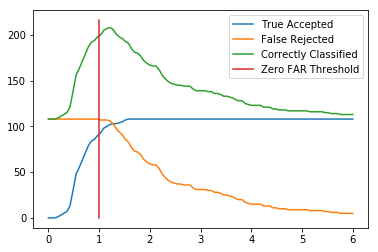

In [30]:
x=[]
y=[]

for i in np.linspace(0, 6, 100):
    x.append(i)
    y.append(a.threshold_score(i))


print(pd.DataFrame(x).loc[(pd.DataFrame(y).idxmax().values)], pd.DataFrame(y).max())
  
plt.plot(x, y)
plt.plot(np.ones(100)*1, np.linspace(0, 216, 100))
plt.legend(["Legal Accepted", "Imposter Rejected", "Correctly Classified", "Zero FAR Threshold"])

In [24]:
a.score(threshold=1.2121)

[0.3556 0.1725 0.2758 0.2086 0.2409]
true_accepted:102
false_rejected: 106
Acc with 1.2121 threshold: 0.9629629629629629
Min False: 0.983
zero_far_true_accepted: 91
total: 216
Acc with Zero FAR Threshold: 0.9212962962962963


In [514]:
df[-10:]

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
20390    s057             8   41    0.0649       0.0754       0.0105  0.0944   
20391    s057             8   42    0.0831       0.0865       0.0034  0.0757   
20392    s057             8   43    0.0665       0.0678       0.0013  0.0902   
20393    s057             8   44    0.0834       0.1147       0.0313  0.1002   
20394    s057             8   45    0.0918       0.1018       0.0100  0.0802   
20395    s057             8   46    0.0884       0.0685      -0.0199  0.1095   
20396    s057             8   47    0.0655       0.0630      -0.0025  0.0910   
20397    s057             8   48    0.0939       0.1189       0.0250  0.1008   
20398    s057             8   49    0.0923       0.1294       0.0371  0.0913   
20399    s057             8   50    0.0596       0.1310       0.0714  0.0992   

       DD.t.i  UD.t.i     H.i    ...        H.a  DD.a.n  UD.a.n     H.n  \
20390  0.1451  0.0507  0.0599    ...     0.1118  0.1198  0.0080  0.0217   
20391  0.1274  0.0517  0.0608    ...     0.0976  0.0897 -0.0079  0.0547   
20392  0.1601  0.0699  0.0515    ...     0.1031  0.0765 -0.0266  0.0768   
20393  0.1055  0.0053  0.0744    ...     0.0971  0.0929 -0.0042  0.0520   
20394  0.1158  0.0356  0.0821    ...     0.1016  0.0974 -0.0042  0.0483   
20395  0.1290  0.0195  0.0945    ...     0.1219  0.1383  0.0164  0.0820   
20396  0.1148  0.0238  0.0916    ...     0.1008  0.0512 -0.0496  0.1037   
20397  0.1122  0.0114  0.0721    ...     0.0913  0.1169  0.0256  0.0689   
20398  0.0990  0.0077  0.0992    ...     0.0882  0.0821 -0.0061  0.0576   
20399  0.1103  0.0111  0.0998    ...     0.0969  0.0784 -0.0185  0.0790   

       DD.n.l  UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
20390  0.0246  0.0029  0.1277       0.3425       0.2148    0.1147  
20391  0.0380 -0.0167  0.1282       0.2267       0.0985    0.1224  
20392  0.0622 -0.0146  0.1051       0.2047       0.0996    0.1105  
20393  0.0406 -0.0114  0.1290       0.2246       0.0956    0.1097  
20394  0.0448 -0.0035  0.1253       0.2436       0.1183    0.1324  
20395  0.1329  0.0509  0.1005       0.2054       0.1049    0.1047  
20396  0.0868 -0.0169  0.1445       0.2206       0.0761    0.1198  
20397  0.1311  0.0622  0.1034       0.2017       0.0983    0.0905  
20398  0.0697  0.0121  0.0979       0.1917       0.0938    0.0931  
20399  0.1133  0.0343  0.0807       0.1993       0.1186    0.1018  

[10 rows x 34 columns]

### Anaomality Detection + Fully Connected

In [34]:
true_subject = "s003"

true_df = test_df[test_df.subject == true_subject]
H_mean = true_df[H_cols].median()
DD_mean = true_df[DD_cols].median()
UD_mean = true_df[UD_cols].median()

train_df = df[(df.subject == true_subject) & (df.sessionIndex > 6) & (df.rep > 25)]
print(len(train_df))
labels = np.zeros(len(train_df))
false_samples = df[(df.subject != true_subject) & (df.sessionIndex < 4) & (df.rep < 15)].sample(len(train_df))
labels = np.append(labels, np.ones(len(false_samples)))
train_df = train_df.append(false_samples)

print(len(train_df))

# true_mean
H_dist = distance.cdist([np.array(H_mean)], np.array(train_df[H_cols]), "cityblock", VI=None)
DD_dist = distance.cdist([np.array(DD_mean)], np.array(train_df[DD_cols]), "cityblock", VI=None)
UD_dist = distance.cdist([np.array(UD_mean)], np.array(train_df[UD_cols]), "cityblock", VI=None)

all_dist = np.concatenate((H_dist.T, DD_dist.T), axis=1)
all_dist, labels

50
100


(array([[ 0.35895,  0.43755],
        [ 0.27805,  0.58505],
        [ 0.38295,  0.61135],
        [ 0.35135,  0.46215],
        [ 0.21155,  0.34885],
        [ 0.41815,  0.54245],
        [ 0.23855,  0.33725],
        [ 0.40555,  0.30635],
        [ 0.29365,  0.32285],
        [ 0.20475,  0.37345],
        [ 0.20405,  0.36045],
        [ 0.23575,  0.31675],
        [ 0.27205,  0.33575],
        [ 0.33235,  0.80065],
        [ 0.26865,  0.41065],
        [ 0.26745,  0.38305],
        [ 0.32235,  0.36935],
        [ 0.20895,  0.31335],
        [ 0.22025,  0.26235],
        [ 0.28945,  0.77315],
        [ 0.25245,  0.36185],
        [ 0.30745,  0.39325],
        [ 0.44915,  0.53405],
        [ 0.33885,  0.57025],
        [ 0.25325,  0.55855],
        [ 0.16325,  0.29295],
        [ 0.13505,  0.34155],
        [ 0.19095,  0.25515],
        [ 0.12885,  0.31305],
        [ 0.13725,  0.21055],
        [ 0.23365,  0.30115],
        [ 0.28215,  0.31455],
        [ 0.13835,  0.29015],
        [ 

In [35]:
print(np.mean(np.sum(all_dist, axis=1)[:50]))
print(accuracy_score((np.sum(all_dist, axis=1)>0.62)*1, (labels==1)*1))
# (np.sum(all_dist, axis=1)<1)*1
# labels==0

0.624344
0.82


In [36]:
lr = 4e-3

model = Sequential()
model.add(Dense(1, input_shape=(2,)))
# model.add(Dense(1, input_shape=(3,),activation="sigmoid"))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

model.summary()

model.compile(optimizer=Adam(lr),
          loss='mse',
          metrics=['accuracy', 'mse'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [113]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(all_dist, labels)

for train_index, test_index in sss.split(all_dist, labels):
    X_train, X_test = all_dist[train_index], all_dist[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    print("TRAIN:", len(X_train), "TEST:", y_train.sum())
    

TRAIN: 560 TEST: 280.0


In [13]:
labels = labels*-1000 + 1000

In [37]:
model.fit(all_dist, labels, 
              validation_split= 0.3, 
              epochs=100,
               callbacks=[ # TensorBoard(),
                   EarlyStopping('val_mean_squared_error', patience=5, restore_best_weights=True)
               ], 
              batch_size=70)

Train on 70 samples, validate on 30 samples
Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 2.0652 - acc: 0.4286 - mean_squared_error: 2.0652 - val_loss: 1.3357 - val_acc: 0.2667 - val_mean_squared_error: 1.3357
Epoch 2/100
70/70 [==============================] - 0s 28us/step - loss: 2.0331 - acc: 0.4286 - mean_squared_error: 2.0331 - val_loss: 1.3062 - val_acc: 0.3333 - val_mean_squared_error: 1.3062
Epoch 3/100
70/70 [==============================] - 0s 29us/step - loss: 2.0014 - acc: 0.4429 - mean_squared_error: 2.0014 - val_loss: 1.2797 - val_acc: 0.3667 - val_mean_squared_error: 1.2797
Epoch 4/100
70/70 [==============================] - 0s 28us/step - loss: 1.9728 - acc: 0.4429 - mean_squared_error: 1.9728 - val_loss: 1.2526 - val_acc: 0.3667 - val_mean_squared_error: 1.2526
Epoch 5/100
70/70 [==============================] - 0s 28us/step - loss: 1.9435 - acc: 0.4571 - mean_squared_error: 1.9435 - val_loss: 1.2254 - val_acc: 0.3667 - val_mean_squared_e

Epoch 43/100
70/70 [==============================] - 0s 29us/step - loss: 1.0017 - acc: 0.7571 - mean_squared_error: 1.0017 - val_loss: 0.4494 - val_acc: 0.6667 - val_mean_squared_error: 0.4494
Epoch 44/100
70/70 [==============================] - 0s 43us/step - loss: 0.9835 - acc: 0.7571 - mean_squared_error: 0.9835 - val_loss: 0.4368 - val_acc: 0.6667 - val_mean_squared_error: 0.4368
Epoch 45/100
70/70 [==============================] - 0s 29us/step - loss: 0.9656 - acc: 0.7857 - mean_squared_error: 0.9656 - val_loss: 0.4245 - val_acc: 0.7000 - val_mean_squared_error: 0.4245
Epoch 46/100
70/70 [==============================] - 0s 43us/step - loss: 0.9480 - acc: 0.7857 - mean_squared_error: 0.9480 - val_loss: 0.4125 - val_acc: 0.7333 - val_mean_squared_error: 0.4125
Epoch 47/100
70/70 [==============================] - 0s 43us/step - loss: 0.9307 - acc: 0.7857 - mean_squared_error: 0.9307 - val_loss: 0.4010 - val_acc: 0.7333 - val_mean_squared_error: 0.4010
Epoch 48/100
70/70 [=====

Epoch 86/100
70/70 [==============================] - 0s 43us/step - loss: 0.4650 - acc: 0.9143 - mean_squared_error: 0.4650 - val_loss: 0.1637 - val_acc: 0.8667 - val_mean_squared_error: 0.1637
Epoch 87/100
70/70 [==============================] - 0s 29us/step - loss: 0.4574 - acc: 0.9143 - mean_squared_error: 0.4574 - val_loss: 0.1617 - val_acc: 0.8667 - val_mean_squared_error: 0.1617
Epoch 88/100
70/70 [==============================] - 0s 214us/step - loss: 0.4500 - acc: 0.9143 - mean_squared_error: 0.4500 - val_loss: 0.1598 - val_acc: 0.8667 - val_mean_squared_error: 0.1598
Epoch 89/100
70/70 [==============================] - 0s 28us/step - loss: 0.4427 - acc: 0.9143 - mean_squared_error: 0.4427 - val_loss: 0.1581 - val_acc: 0.8333 - val_mean_squared_error: 0.1581
Epoch 90/100
70/70 [==============================] - 0s 28us/step - loss: 0.4355 - acc: 0.9286 - mean_squared_error: 0.4355 - val_loss: 0.1565 - val_acc: 0.8333 - val_mean_squared_error: 0.1565
Epoch 91/100
70/70 [====

In [39]:
accuracy_score(np.array(model.predict(all_dist) < 0.5).flatten(), (labels==0)*1)

0.96

In [359]:
n = 0
for layer in model.layers:
    n = n + 1
    weights = layer.get_weights()
    print("Layer: " + str(n))
    print(weights)

Layer: 1
[array([[1.4197206 ],
       [0.01678598]], dtype=float32), array([-0.25448212], dtype=float32)]


In [339]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-0.5697462 ],
       [ 0.44155467]], dtype=float32), array([0.1173697], dtype=float32)]


In [147]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[ 0.91355383,  0.46053514,  0.08925703],
       [ 0.43789735,  0.08297072,  0.6054977 ],
       [-0.68087536, -0.90196043, -0.79834026]], dtype=float32), array([-0.00110364,  0.00018757,  0.00107381], dtype=float32)]
[array([[-1.1120623],
       [ 0.7322415],
       [ 0.8544362]], dtype=float32), array([0.0011034], dtype=float32)]


## Results

In [321]:
train()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 66)                2112      
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 67        
Total params: 2,179
Trainable params: 2,179
Non-trainable params: 0
_________________________________________________________________
Train on 70 samples, validate on 30 samples
Epoch 1/200
70/70 [==============================] - 2s 27ms/step - loss: 0.6725 - acc: 0.6714 - mean_squared_error: 0.2397 - val_loss: 0.7516 - val_acc: 0.1000 - val_mean_squared_error: 0.2792
Epoch 2/200
70/70 [==============================] - 0s 71us/step - loss: 0.6724 - acc: 0.6714 - mean_squared_error: 0.2397 - val_loss: 0.7519 - val_acc: 0.1000 - val_mean_squared_error: 0.2793
Epoch 3/200
70/70 [==============================] - 0s 86us/step - loss: 0.6723 - acc: 0.6714 - mean_sq

Epoch 40/200
70/70 [==============================] - 0s 57us/step - loss: 0.6687 - acc: 0.6857 - mean_squared_error: 0.2378 - val_loss: 0.7630 - val_acc: 0.0667 - val_mean_squared_error: 0.2849
Epoch 41/200
70/70 [==============================] - 0s 57us/step - loss: 0.6686 - acc: 0.6857 - mean_squared_error: 0.2377 - val_loss: 0.7633 - val_acc: 0.0667 - val_mean_squared_error: 0.2850
Epoch 42/200
70/70 [==============================] - 0s 86us/step - loss: 0.6685 - acc: 0.6857 - mean_squared_error: 0.2377 - val_loss: 0.7636 - val_acc: 0.0667 - val_mean_squared_error: 0.2851
Epoch 43/200
70/70 [==============================] - 0s 100us/step - loss: 0.6684 - acc: 0.6857 - mean_squared_error: 0.2376 - val_loss: 0.7639 - val_acc: 0.0667 - val_mean_squared_error: 0.2853
Epoch 44/200
70/70 [==============================] - 0s 86us/step - loss: 0.6683 - acc: 0.6857 - mean_squared_error: 0.2376 - val_loss: 0.7642 - val_acc: 0.0667 - val_mean_squared_error: 0.2854
Epoch 45/200
70/70 [====

Epoch 82/200
70/70 [==============================] - 0s 71us/step - loss: 0.6647 - acc: 0.6857 - mean_squared_error: 0.2358 - val_loss: 0.7752 - val_acc: 0.0667 - val_mean_squared_error: 0.2909
Epoch 83/200
70/70 [==============================] - 0s 57us/step - loss: 0.6646 - acc: 0.6857 - mean_squared_error: 0.2358 - val_loss: 0.7755 - val_acc: 0.0667 - val_mean_squared_error: 0.2911
Epoch 84/200
70/70 [==============================] - 0s 86us/step - loss: 0.6645 - acc: 0.6857 - mean_squared_error: 0.2357 - val_loss: 0.7758 - val_acc: 0.0667 - val_mean_squared_error: 0.2912
Epoch 85/200
70/70 [==============================] - 0s 143us/step - loss: 0.6644 - acc: 0.6857 - mean_squared_error: 0.2357 - val_loss: 0.7761 - val_acc: 0.0667 - val_mean_squared_error: 0.2913
Epoch 86/200
70/70 [==============================] - 0s 114us/step - loss: 0.6643 - acc: 0.6857 - mean_squared_error: 0.2356 - val_loss: 0.7764 - val_acc: 0.0667 - val_mean_squared_error: 0.2915
Epoch 87/200
70/70 [===

Epoch 124/200
70/70 [==============================] - 0s 129us/step - loss: 0.6609 - acc: 0.6857 - mean_squared_error: 0.2339 - val_loss: 0.7874 - val_acc: 0.0667 - val_mean_squared_error: 0.2969
Epoch 125/200
70/70 [==============================] - 0s 57us/step - loss: 0.6608 - acc: 0.6857 - mean_squared_error: 0.2339 - val_loss: 0.7877 - val_acc: 0.0667 - val_mean_squared_error: 0.2971
Epoch 126/200
70/70 [==============================] - 0s 86us/step - loss: 0.6607 - acc: 0.6857 - mean_squared_error: 0.2338 - val_loss: 0.7880 - val_acc: 0.0667 - val_mean_squared_error: 0.2972
Epoch 127/200
70/70 [==============================] - 0s 86us/step - loss: 0.6606 - acc: 0.6857 - mean_squared_error: 0.2338 - val_loss: 0.7883 - val_acc: 0.0667 - val_mean_squared_error: 0.2974
Epoch 128/200
70/70 [==============================] - 0s 100us/step - loss: 0.6606 - acc: 0.6857 - mean_squared_error: 0.2338 - val_loss: 0.7886 - val_acc: 0.0667 - val_mean_squared_error: 0.2975
Epoch 129/200
70/7

Epoch 166/200
70/70 [==============================] - 0s 86us/step - loss: 0.6573 - acc: 0.6857 - mean_squared_error: 0.2321 - val_loss: 0.7995 - val_acc: 0.0667 - val_mean_squared_error: 0.3029
Epoch 167/200
70/70 [==============================] - 0s 86us/step - loss: 0.6572 - acc: 0.6857 - mean_squared_error: 0.2321 - val_loss: 0.7998 - val_acc: 0.0667 - val_mean_squared_error: 0.3030
Epoch 168/200
70/70 [==============================] - 0s 86us/step - loss: 0.6571 - acc: 0.6857 - mean_squared_error: 0.2321 - val_loss: 0.8001 - val_acc: 0.0667 - val_mean_squared_error: 0.3032
Epoch 169/200
70/70 [==============================] - 0s 100us/step - loss: 0.6571 - acc: 0.6857 - mean_squared_error: 0.2320 - val_loss: 0.8003 - val_acc: 0.0667 - val_mean_squared_error: 0.3033
Epoch 170/200
70/70 [==============================] - 0s 157us/step - loss: 0.6570 - acc: 0.6857 - mean_squared_error: 0.2320 - val_loss: 0.8006 - val_acc: 0.0667 - val_mean_squared_error: 0.3035
Epoch 171/200
70/7

'trained'

loss: 0.6896 - acc: 0.7950 - mean_squared_error: 0.0058 - val_loss: 15.7996 - val_acc: 0.0185 - val_mean_squared_error: 0.0284
loss: 1.0201 - acc: 0.6957 - mean_squared_error: 0.0082 - val_loss: 15.4035 - val_acc: 0.0181 - val_mean_squared_error: 0.0264
loss: 0.4325 - acc: 0.8689 - mean_squared_error: 0.0037 - val_loss: 15.6569 - val_acc: 0.0191 - val_mean_squared_error: 0.0295